# Supervised discretization
Dataset: satimage
By: Sam & Malina
Update: 21/06/22

### About Dataset
NUMBER OF ATTRIBUTES: 36 (= 4 spectral bands x 9 pixels in neighbourhood) the pixels read out in sequence left-to-right and top-to-bottom. 

    - A1-A4: 4 top-left
    - A5-A8: 4 top middle
    - A9-A12: 4 top-right
    => central pixel are given by attributes 17,18,19 and 20

NUMBER OF EXAMPLES:

	- training set     4435
	- test set         2000
    
ATTRIBUTES: The attributes are numerical, in the range 0 to 255.
CLASS: 
	There are 6 decision classes: 1,2,3,4,5 and 7.

!!! NB. There are no examples with class 6 in this dataset-they have all been removed because of doubts about the 
	validity of this class.
    
!!! NB. DO NOT USE CROSS-VALIDATION WITH THIS DATASET !!!
- Just train and test only once with the above training and test sets.
- The data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset.

# 1. Data preparation

In [1]:
# Import library
import pandas as pd
import numpy as np
from collections import Counter #for Chi Merge

In [2]:
# Read data
data0_trn = pd.read_csv('sat_trn.csv', header=None, delim_whitespace=True) #training raw data
data0_tst = pd.read_csv('sat_tst.csv', header=None, delim_whitespace=True) #testing raw data

In [3]:
data0_trn.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [4]:
col0 = pd.read_csv('sat_col.csv', header=None, squeeze=True) #import column name

In [5]:
data0_trn.columns = col0 # change column name
data0_tst.columns = col0

In [6]:
data0_trn['class'] = pd.Categorical(data0_trn['class']) # convert class to categorical data
data0_tst['class'] = pd.Categorical(data0_tst['class'])

In [7]:
data0_trn.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [8]:
# Check number of unique values
data0_trn.select_dtypes(include=np.number).nunique()


0
A1      50
A2      81
A3      74
A4     101
A5      49
A6      81
A7      74
A8     100
A9      50
A10     80
A11     77
A12    102
A13     49
A14     82
A15     75
A16     98
A17     49
A18     79
A19     72
A20     99
A21     50
A22     79
A23     75
A24    101
A25     50
A26     82
A27     74
A28     97
A29     50
A30     80
A31     76
A32    101
A33     49
A34     79
A35     77
A36    104
dtype: int64

In [9]:
# Check number of unique values
data0_tst.select_dtypes(include=np.number).nunique()

0
A1     48
A2     78
A3     73
A4     96
A5     49
A6     75
A7     73
A8     96
A9     48
A10    73
A11    71
A12    94
A13    51
A14    76
A15    74
A16    96
A17    49
A18    76
A19    75
A20    97
A21    48
A22    73
A23    74
A24    95
A25    49
A26    74
A27    72
A28    96
A29    48
A30    76
A31    73
A32    94
A33    49
A34    75
A35    71
A36    92
dtype: int64

In [10]:
data0 = pd.concat([data0_trn, data0_tst])

In [11]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      6435 non-null   int64   
 1   A2      6435 non-null   int64   
 2   A3      6435 non-null   int64   
 3   A4      6435 non-null   int64   
 4   A5      6435 non-null   int64   
 5   A6      6435 non-null   int64   
 6   A7      6435 non-null   int64   
 7   A8      6435 non-null   int64   
 8   A9      6435 non-null   int64   
 9   A10     6435 non-null   int64   
 10  A11     6435 non-null   int64   
 11  A12     6435 non-null   int64   
 12  A13     6435 non-null   int64   
 13  A14     6435 non-null   int64   
 14  A15     6435 non-null   int64   
 15  A16     6435 non-null   int64   
 16  A17     6435 non-null   int64   
 17  A18     6435 non-null   int64   
 18  A19     6435 non-null   int64   
 19  A20     6435 non-null   int64   
 20  A21     6435 non-null   int64   
 21  A22     6435 n

In [12]:
data0_trn.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4
4434,71,91,100,81,76,95,108,88,80,95,...,85,70,91,104,85,63,91,100,81,4


In [13]:
data0.iloc[4435]==data0_tst.iloc[0] # Check: first item of tesing dataset in the merged dataset

0
A1       True
A2       True
A3       True
A4       True
A5       True
A6       True
A7       True
A8       True
A9       True
A10      True
A11      True
A12      True
A13      True
A14      True
A15      True
A16      True
A17      True
A18      True
A19      True
A20      True
A21      True
A22      True
A23      True
A24      True
A25      True
A26      True
A27      True
A28      True
A29      True
A30      True
A31      True
A32      True
A33      True
A34      True
A35      True
A36      True
class    True
Name: 0, dtype: bool

In [14]:
# Export this dataset for discretization
data0.to_csv('clean_satimage.csv',index=False)

In [15]:
satimage = data0
satimage

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,...,92,66,87,108,89,63,83,104,85,1
1996,64,79,100,85,56,71,96,85,56,68,...,85,66,83,100,85,63,83,100,81,1
1997,56,68,91,81,56,64,91,81,53,64,...,81,59,87,96,81,63,83,92,74,5
1998,56,68,87,74,60,71,91,81,60,64,...,74,59,83,92,74,59,83,92,70,5


# 2. ChiMerge discretization

In [16]:
#Define function for chiMerge
def chimerge(data, attr, label, max_intervals):
    distinct_vals = sorted(set(data[attr])) # Sort the distinct values
    labels = sorted(set(data[label])) # Get all possible labels
    empty_count = {l: 0 for l in labels} # A helper function for padding the Counter()
    intervals = [[distinct_vals[i], distinct_vals[i]] for i in range(len(distinct_vals))] # Initialize the intervals for each attribute
    while len(intervals) > max_intervals: # While loop
        chi = []
        for i in range(len(intervals)-1):
            # Calculate the Chi2 value
            obs0 = data[data[attr].between(intervals[i][0], intervals[i][1])]
            obs1 = data[data[attr].between(intervals[i+1][0], intervals[i+1][1])]
            total = len(obs0) + len(obs1)
            count_0 = np.array([v for i, v in {**empty_count, **Counter(obs0[label])}.items()])
            count_1 = np.array([v for i, v in {**empty_count, **Counter(obs1[label])}.items()])
            count_total = count_0 + count_1
            expected_0 = count_total*sum(count_0)/total
            expected_1 = count_total*sum(count_1)/total
            chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1
            chi_ = np.nan_to_num(chi_) # Deal with the zero counts
            chi.append(sum(chi_)) # Finally do the summation for Chi2
        min_chi = min(chi) # Find the minimal Chi2 for current iteration
        for i, v in enumerate(chi):
            if v == min_chi:
                min_chi_index = i # Find the index of the interval to be merged
                break
        new_intervals = [] # Prepare for the merged new data array
        skip = False
        done = False
        for i in range(len(intervals)):
            if skip:
                skip = False
                continue
            if i == min_chi_index and not done: # Merge the intervals
                t = intervals[i] + intervals[i+1]
                new_intervals.append([min(t), max(t)])
                skip = True
                done = True
            else:
                new_intervals.append(intervals[i])
        intervals = new_intervals
    for i in intervals:
        print('[', i[0], ',', i[1], ']', sep='')
    return intervals

In [17]:
# FUNCTION: Mapping interval to dataframe 
def chi_map2 (attr, data):
    disc_list = []
    for j in range(0,len(data)):
        #print('Raw value:', data[attr].loc[j])
        for i in range (0,len(chi_intervals[attr])):      
            if data[attr].loc[j] in range(chi_intervals[attr][i][0],chi_intervals[attr][i][1]):
                disc_list.append(i)
                #print('label',i)
            elif data[attr].loc[j] in chi_intervals[attr][i]: # In case upper and lower are equal
                disc_list.append(i)
                #print('label',i)
    return disc_list

In [18]:
# DEBUG CHIMAP FUNCTION: Mapping interval to dataframe 
def chi_map3 (attr, data):
    disc_list = []
    for j in range(0,len(data)):
        #print('Raw value:', data[attr].loc[j])
        for i in range (0,len(chi_intervals[attr])): 
            if ( [chi_intervals[attr][i][0] <= data[attr].loc[j]] & [data[attr].loc[j] <= chi_intervals[attr][i][1]]):
                disc_list.append(i)
    return disc_list

In [19]:
# x = chi_intervals['A1'][0][0]
# y = pen['A1'].loc[2]
# z = chi_intervals['A1'][0][1]
# print(x)
# print(y)
# print(z)

# if ((x <= y) & (y <= z)):
#     print('sucess')


# DEBUG CHIMAP FUNCTION: Mapping interval to dataframe 
def chi_map (attr, data):
    disc_list = []
    for j in range(0,len(data)):
        #print('Raw value:', data[attr].loc[j])
        for i in range (0,len(chi_intervals[attr])):
            x = chi_intervals[attr][i][0]
            y = data[attr].iloc[j]
            z = chi_intervals[attr][i][1]
            if (x <= y) & (y <= z):
                    disc_list.append(i)
    return disc_list

In [20]:
# Get list of attribute to discrete
num_list = satimage.columns
num_list

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'class'],
      dtype='object', name=0)

## 2.1 ChiMerge with 6 Intervals

In [21]:
#Chi Merge with 6 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=satimage, attr=i, label='class', max_intervals=6)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created
satimage_disc_6intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, satimage)
    print(v)
    satimage_disc_6intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
satimage_disc_6intervals = pd.DataFrame.from_dict(satimage_disc_6intervals)

satimage_disc_6intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_17396/1210875316.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[39,48]
[49,60]
[63,71]
[72,76]
[78,84]
[85,104]
[27,46]
[48,64]
[66,81]
[83,91]
[92,99]
[100,137]
[53,80]
[81,91]
[92,100]
[101,113]
[114,130]
[131,140]
[33,66]
[67,73]
[74,81]
[83,94]
[96,109]
[110,154]
[39,48]
[49,50]
[51,60]
[63,71]
[72,80]
[82,104]
[27,40]
[42,62]
[63,77]
[79,91]
[92,99]
[100,137]
[50,79]
[80,88]
[89,96]
[97,102]
[104,118]
[119,145]
[29,69]
[70,76]
[78,81]
[83,94]
[96,104]
[105,157]
[40,48]
[49,50]
[51,60]
[63,72]
[74,80]
[82,104]
[27,42]
[43,64]
[66,84]
[85,91]
[92,99]
[100,130]
[50,79]
[80,88]
[89,100]
[101,115]
[117,130]
[131,145]
[29,65]
[66,76]
[78,85]
[86,94]
[96,105]
[107,157]
[39,47]
[48,60]
[63,72]
[74,80]
[82,84]
[85,104]
[27,40]
[42,64]
[66,81]
[83,91]
[92,100]
[102,137]
[50,79]
[80,88]
[89,98]
[100,105]
[106,114]
[115,145]
[29,65]
[66,78]
[79,85]
[86,97]
[98,104]
[105,154]
[40,48]
[49,60]
[63,68]
[70,76]
[78,84]
[85,104]
[27,40]
[42,64]
[66,79]
[81,91]
[92,96]
[97,130]
[50,83]
[84,90]
[91,102]
[104,114]
[115,130]
[131,145]
[29,50]
[51,65]
[66,78]
[79,9

[4, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 1, 1, 2, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 0, 0, 5, 4, 3, 3, 3, 3, 4, 4, 4, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 4, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 3, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 4, 3, 4, 4, 5, 4, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 3, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 4, 4, 4, 5, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 4, 

[3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 4, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 4, 4, 4, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 4, 4, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 5, 5, 5, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 0, 1, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 4, 5, 

[5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 0, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 1, 0, 0, 0, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 2, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 3, 0, 0, 

[4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 2, 3, 2, 1, 2, 2, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 4, 2, 0, 0, 1, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 2, 4, 3, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 4, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 5, 5, 4, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 5, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 1, 0, 0, 0, 0, 5, 5, 5, 5, 5, 4, 4, 3, 4, 3, 2, 2, 3, 2, 2, 2, 2, 5, 5, 

[5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 2, 4, 5, 3, 3, 3, 2, 2, 2, 2, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 2, 2, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 3, 2, 0, 0, 

[5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 2, 1, 4, 4, 2, 2, 2, 1, 1, 1, 1, 5, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 4, 4, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 3, 2, 4, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 0, 0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 1, 0, 0, 0, 0, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 3, 2, 2, 2, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 1, 0, 0, 

[3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 1, 0, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 3, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 

[5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 3, 2, 1, 2, 3, 2, 2, 2, 1, 1, 1, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 4, 4, 3, 3, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 2, 2, 2, 2, 1, 1, 1, 5, 5, 5, 5, 5, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 0, 0, 0, 1, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 4, 4, 3, 4, 4, 4, 4, 5, 3, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 3, 4, 2, 3, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 0, 0, 

[5, 5, 5, 4, 4, 4, 5, 5, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 4, 4, 3, 2, 1, 2, 3, 2, 2, 2, 2, 1, 1, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2, 1, 1, 0, 2, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 0, 0, 0, 1, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 3, 2, 2, 2, 2, 2, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 4, 3, 3, 2, 1, 0, 0, 

[5, 5, 3, 3, 3, 3, 5, 5, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 3, 5, 4, 4, 3, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 2, 1, 1, 3, 2, 0, 1, 0, 0, 0, 0, 5, 5, 4, 3, 3, 4, 4, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 4, 3, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 2, 1, 1, 1, 1, 0, 1, 0, 0, 4, 4, 5, 5, 5, 4, 4, 3, 4, 4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 5, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 1, 0, 1, 0, 0, 0, 0, 5, 4, 4, 5, 4, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 5, 5, 5, 5, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 5, 5, 5, 5, 5, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 1, 1, 1, 1, 0, 5, 5, 5, 5, 5, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 4, 5, 5, 

[4, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 4, 4, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 4, 4, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 5, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 3, 3, 3, 5, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 5, 5, 5, 5, 5, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 4, 3, 3, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 5, 5, 5, 5, 5, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 0, 1, 0, 0, 0, 5, 4, 4, 5, 5, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 5, 5, 5, 

[5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 1, 2, 4, 2, 2, 2, 2, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 5, 4, 3, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 5, 3, 3, 2, 3, 2, 2, 1, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 1, 0, 0, 0, 

[4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 4, 4, 5, 5, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 4, 4, 5, 

[3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 4, 4, 4, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 4, 4, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 

[4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 4, 3, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 4, 4, 4, 5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 5, 5, 5, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 0, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 0, 1, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 4, 4, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 5, 5, 5, 5, 5, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 3, 4, 4, 4, 3, 2, 2, 1, 1, 5, 5, 5, 5, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 1, 0, 0, 0, 

[3, 3, 3, 3, 3, 4, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 5, 4, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 5, 4, 4, 3, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 4, 5, 5, 4, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 5, 4, 

[2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 4, 4, 3, 2, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 5, 4, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 5, 5, 5, 5, 4, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 4, 4, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 

[5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 2, 2, 2, 1, 1, 1, 5, 5, 5, 5, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 0, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1, 5, 5, 4, 5, 5, 5, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 1, 0, 0, 0, 1, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 3, 3, 2, 2, 2, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 3, 4, 3, 3, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 4, 3, 2, 2, 2, 1, 0, 0, 0, 

[5, 5, 5, 4, 4, 5, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 3, 3, 4, 3, 2, 2, 1, 1, 1, 1, 5, 5, 5, 5, 4, 4, 4, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 2, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 2, 2, 2, 2, 2, 1, 2, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 3, 2, 3, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 0, 0, 0, 0, 

[5, 4, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 4, 4, 4, 4, 3, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 5, 5, 5, 5, 5, 5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 5, 4, 4, 4, 5, 5, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 

[5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 4, 4, 5, 3, 3, 3, 3, 4, 4, 2, 2, 2, 1, 1, 1, 1, 5, 5, 5, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 0, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4, 3, 2, 2, 2, 1, 1, 1, 1, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 3, 3, 4, 4, 4, 4, 4, 5, 3, 2, 2, 2, 2, 2, 2, 1, 5, 5, 5, 5, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4, 3, 2, 2, 3, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 3, 4, 3, 3, 3, 2, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 4, 3, 4, 3, 2, 1, 0, 0, 0, 0, 

[4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 1, 0, 0, 0, 1, 0, 0, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0, 1, 0, 0, 0, 0, 0, 4, 4, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 1, 0, 0, 0, 0, 4, 4, 5, 5, 5, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 2, 2, 3, 2, 2, 1, 1, 1, 0, 0, 5, 5, 4, 4, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 

[5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 3, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 5, 4, 3, 2, 2, 1, 1, 1, 1, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 2, 2, 1, 1, 1, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 3, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 0, 0, 0, 3, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 3, 3, 2, 2, 2, 2, 1, 1, 5, 5, 5, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 3, 3, 3, 2, 3, 2, 1, 1, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 3, 2, 3, 3, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 3, 1, 1, 0, 0, 0, 0, 

[5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 2, 3, 5, 4, 2, 2, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 0, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 4, 3, 2, 2, 1, 1, 1, 1, 1, 0, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 3, 2, 2, 2, 2, 1, 2, 1, 1, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 4, 4, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 2, 3, 3, 2, 2, 2, 1, 1, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 4, 4, 3, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 3, 2, 1, 1, 0, 0, 0, 0, 

[4, 3, 3, 3, 4, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 4, 4, 4, 3, 3, 4, 4, 4, 3, 2, 2, 2, 2, 2, 1, 2, 3, 4, 5, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 4, 5, 4, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 2, 3, 2, 5, 5, 5, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 4, 4, 5, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 5, 5, 5, 5, 

[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 

In [22]:
#convert to csv file
satimage_disc_6intervals.to_csv('ChiM_discretized_6Intervals_satimage.csv',index=False)

## 2.2 ChiMerge with 8 Intervals

In [23]:
#Chi Merge with 8 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=satimage, attr=i, label='class', max_intervals=8)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created (sample size = 50)
satimage_disc_8intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, satimage) # musk 50: sample data
    print(v)
    satimage_disc_8intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
satimage_disc_8intervals = pd.DataFrame.from_dict(satimage_disc_8intervals)

satimage_disc_8intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_17396/1210875316.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[39,48]
[49,51]
[52,60]
[63,71]
[72,76]
[78,80]
[82,84]
[85,104]
[27,37]
[39,46]
[48,59]
[60,64]
[66,81]
[83,91]
[92,99]
[100,137]
[53,80]
[81,85]
[86,91]
[92,100]
[101,113]
[114,118]
[119,130]
[131,140]
[33,50]
[51,66]
[67,73]
[74,81]
[83,94]
[96,102]
[103,109]
[110,154]
[39,48]
[49,50]
[51,60]
[63,71]
[72,75]
[76,80]
[82,84]
[85,104]
[27,40]
[42,49]
[51,62]
[63,77]
[79,84]
[85,91]
[92,99]
[100,137]
[50,79]
[80,88]
[89,96]
[97,102]
[104,112]
[113,118]
[119,130]
[131,145]
[29,50]
[51,64]
[65,69]
[70,76]
[78,81]
[83,94]
[96,104]
[105,157]
[40,48]
[49,50]
[51,57]
[59,60]
[63,72]
[74,80]
[82,84]
[85,104]
[27,42]
[43,60]
[61,64]
[66,77]
[79,84]
[85,91]
[92,99]
[100,130]
[50,79]
[80,88]
[89,93]
[94,100]
[101,104]
[105,115]
[117,130]
[131,145]
[29,50]
[51,65]
[66,69]
[70,76]
[78,85]
[86,94]
[96,105]
[107,157]
[39,47]
[48,53]
[55,60]
[63,72]
[74,76]
[78,80]
[82,84]
[85,104]
[27,40]
[42,49]
[51,61]
[62,64]
[66,81]
[83,91]
[92,100]
[102,137]
[50,79]
[80,88]
[89,93]
[94,98]
[100,105]
[106,114]
[

[7, 7, 7, 7, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 3, 4, 6, 4, 4, 4, 4, 2, 2, 7, 7, 7, 6, 6, 6, 7, 7, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 7, 7, 7, 6, 5, 4, 5, 5, 4, 4, 4, 4, 4, 2, 2, 2, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 6, 6, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 4, 6, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 1, 0, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 6, 7, 7, 6, 5, 4, 4, 4, 3, 3, 2, 2, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 1, 0, 0, 2, 4, 7, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 4, 4, 4, 3, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 6, 5, 5, 2, 1, 

[6, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 2, 3, 3, 2, 2, 2, 3, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 3, 0, 2, 4, 1, 0, 2, 2, 0, 0, 7, 5, 4, 4, 4, 4, 5, 5, 5, 3, 4, 4, 3, 3, 2, 2, 2, 2, 2, 4, 4, 5, 4, 4, 4, 4, 5, 6, 6, 5, 4, 4, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 6, 7, 7, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 1, 1, 1, 1, 0, 1, 0, 0, 4, 5, 6, 6, 4, 4, 4, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 1, 2, 2, 0, 0, 0, 0, 0, 6, 4, 5, 5, 7, 6, 4, 4, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 6, 6, 6, 4, 3, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 1, 2, 0, 0, 0, 6, 6, 6, 7, 6, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 3, 4, 6, 

[4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 1, 1, 2, 2, 1, 6, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 6, 6, 6, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 4, 5, 5, 4, 3, 3, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 6, 6, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 5, 7, 7, 7, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 1, 2, 1, 1, 1, 5, 5, 5, 6, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 6, 7, 

[6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 5, 5, 7, 5, 7, 7, 7, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 6, 6, 5, 5, 3, 3, 5, 5, 3, 3, 3, 2, 2, 2, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 5, 3, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 5, 4, 3, 3, 3, 3, 3, 6, 6, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 4, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 7, 7, 7, 6, 6, 6, 5, 5, 4, 5, 4, 4, 4, 5, 5, 4, 3, 3, 3, 2, 2, 0, 1, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 5, 5, 6, 6, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 3, 3, 1, 0, 0, 0, 3, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 7, 3, 3, 3, 3, 2, 7, 7, 7, 7, 7, 5, 6, 6, 5, 5, 6, 4, 5, 6, 5, 4, 3, 0, 0, 

[7, 7, 7, 6, 6, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 7, 7, 5, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 3, 3, 6, 6, 3, 3, 3, 2, 1, 1, 7, 7, 6, 6, 6, 7, 7, 7, 7, 5, 5, 6, 5, 5, 4, 4, 4, 4, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 5, 3, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 4, 3, 3, 3, 6, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 6, 7, 6, 6, 6, 5, 4, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1, 1, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 1, 0, 0, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 6, 6, 7, 6, 4, 3, 4, 3, 3, 2, 2, 2, 1, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 3, 1, 0, 0, 0, 3, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 4, 3, 3, 3, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 3, 0, 0, 

[4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 2, 3, 2, 1, 2, 2, 4, 4, 4, 5, 4, 4, 6, 4, 4, 4, 5, 6, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 4, 2, 0, 0, 1, 0, 0, 0, 5, 4, 4, 4, 4, 5, 5, 5, 5, 3, 4, 3, 3, 3, 1, 1, 1, 1, 4, 4, 4, 5, 5, 4, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 2, 1, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 6, 4, 4, 4, 4, 4, 4, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 5, 4, 4, 5, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 2, 4, 3, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 4, 6, 6, 4, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 4, 6, 5, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 4, 5, 5, 7, 6, 5, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 6, 6, 6, 6, 3, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 6, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 1, 0, 0, 0, 0, 6, 6, 7, 6, 6, 4, 4, 3, 4, 3, 2, 2, 3, 2, 2, 2, 2, 6, 6, 

[6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 5, 6, 7, 7, 7, 7, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 6, 6, 7, 6, 6, 5, 5, 4, 3, 5, 6, 4, 4, 4, 2, 2, 2, 2, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 6, 5, 3, 5, 5, 4, 4, 4, 3, 2, 2, 2, 2, 2, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 7, 7, 6, 6, 7, 5, 5, 5, 5, 6, 5, 5, 5, 4, 4, 4, 3, 2, 2, 2, 2, 2, 7, 7, 7, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 1, 1, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 4, 4, 3, 3, 3, 2, 1, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 0, 0, 0, 0, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 6, 7, 7, 6, 5, 6, 6, 6, 6, 6, 7, 5, 4, 4, 4, 3, 2, 7, 7, 7, 7, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 4, 2, 0, 0, 

[7, 7, 6, 6, 7, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 3, 2, 6, 6, 4, 3, 3, 1, 1, 1, 1, 7, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 6, 7, 7, 7, 6, 6, 5, 1, 5, 4, 4, 4, 3, 3, 1, 1, 1, 1, 1, 7, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 4, 4, 3, 3, 4, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 6, 7, 6, 6, 6, 5, 4, 6, 6, 5, 4, 3, 4, 2, 2, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 1, 1, 0, 0, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 7, 6, 4, 3, 4, 3, 3, 1, 1, 1, 1, 0, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 3, 1, 0, 0, 0, 0, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 5, 3, 3, 3, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 3, 2, 0, 0, 

[4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 4, 4, 2, 1, 1, 3, 1, 1, 2, 4, 4, 4, 4, 4, 5, 5, 4, 4, 3, 4, 3, 3, 3, 1, 2, 2, 3, 4, 4, 5, 5, 4, 5, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 2, 2, 2, 3, 1, 1, 1, 2, 6, 6, 5, 4, 4, 5, 5, 5, 4, 3, 3, 3, 3, 3, 2, 1, 1, 3, 4, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 5, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 6, 7, 7, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 1, 2, 3, 3, 2, 5, 5, 7, 6, 5, 4, 5, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 6, 7, 7, 7, 7, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 2, 1, 1, 1, 2, 6, 6, 6, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 4, 5, 7, 7, 

[7, 7, 6, 6, 6, 4, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 5, 3, 2, 3, 4, 3, 3, 3, 2, 1, 2, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 5, 5, 3, 3, 3, 3, 3, 4, 5, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 7, 6, 6, 5, 5, 6, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 4, 5, 5, 4, 5, 4, 3, 2, 2, 1, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 7, 7, 7, 6, 3, 3, 3, 3, 2, 2, 2, 7, 7, 7, 7, 7, 6, 5, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 3, 2, 1, 0, 0, 0, 1, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 6, 6, 5, 6, 6, 6, 6, 7, 5, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 5, 6, 5, 6, 5, 4, 5, 5, 5, 6, 5, 5, 4, 4, 3, 1, 0, 0, 0, 0, 0, 1, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 5, 6, 3, 4, 3, 3, 3, 7, 7, 7, 7, 7, 4, 5, 5, 5, 5, 6, 5, 5, 5, 5, 3, 2, 0, 0, 

[7, 7, 7, 6, 6, 6, 7, 7, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 7, 7, 6, 6, 6, 5, 4, 2, 4, 5, 4, 4, 4, 4, 2, 2, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 4, 4, 4, 3, 2, 2, 2, 1, 7, 7, 7, 7, 7, 6, 6, 6, 7, 6, 6, 5, 5, 5, 5, 5, 5, 4, 2, 1, 0, 4, 6, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 3, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 1, 0, 0, 0, 1, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 5, 4, 4, 4, 4, 4, 3, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 4, 1, 0, 0, 0, 0, 0, 2, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 5, 4, 4, 4, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 6, 5, 5, 4, 1, 0, 0, 

[7, 6, 4, 4, 4, 4, 6, 6, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 4, 6, 5, 5, 4, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 4, 4, 3, 1, 1, 4, 2, 0, 1, 0, 0, 0, 0, 7, 6, 5, 4, 4, 5, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 1, 1, 3, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 2, 1, 1, 1, 1, 0, 1, 0, 0, 5, 5, 6, 6, 6, 5, 5, 4, 5, 5, 3, 2, 3, 1, 2, 2, 2, 1, 3, 4, 6, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 5, 4, 1, 0, 1, 0, 0, 0, 0, 6, 5, 5, 6, 5, 4, 5, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 5, 6, 6, 6, 6, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 6, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 1, 1, 0, 0, 0, 0, 6, 6, 6, 6, 7, 6, 5, 4, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 6, 6, 6, 6, 6, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 4, 4, 4, 1, 1, 1, 1, 0, 7, 6, 7, 7, 7, 4, 4, 4, 3, 4, 3, 3, 3, 2, 2, 4, 5, 7, 6, 

[6, 4, 4, 3, 4, 4, 5, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 1, 6, 6, 5, 4, 4, 5, 5, 5, 4, 3, 3, 2, 2, 2, 1, 1, 1, 2, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 5, 5, 6, 6, 4, 4, 3, 4, 4, 3, 2, 3, 2, 2, 2, 2, 2, 4, 6, 7, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 1, 2, 2, 5, 5, 5, 7, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 6, 7, 7, 7, 7, 7, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 2, 1, 1, 1, 1, 6, 5, 5, 6, 6, 6, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 7, 7, 7, 7, 7, 7, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 1, 2, 1, 1, 1, 7, 6, 6, 7, 7, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 4, 7, 7, 7, 

[7, 6, 6, 6, 4, 4, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 7, 7, 6, 6, 5, 4, 2, 4, 5, 4, 4, 4, 2, 2, 2, 2, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 5, 5, 4, 3, 4, 4, 4, 4, 5, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 7, 6, 6, 6, 5, 5, 6, 4, 4, 4, 3, 3, 2, 2, 2, 2, 1, 7, 7, 7, 7, 6, 6, 6, 5, 6, 5, 5, 5, 4, 4, 5, 4, 4, 2, 2, 1, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 7, 7, 7, 6, 5, 4, 3, 3, 2, 2, 2, 2, 7, 7, 7, 7, 6, 5, 5, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 3, 1, 0, 0, 0, 0, 4, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 7, 5, 4, 4, 4, 3, 3, 3, 3, 2, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 4, 5, 6, 5, 6, 5, 5, 4, 4, 3, 2, 0, 0, 0, 0, 0, 2, 4, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 5, 6, 6, 4, 4, 4, 3, 2, 7, 7, 7, 7, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 4, 2, 1, 0, 0, 

[7, 7, 7, 7, 7, 7, 7, 7, 5, 6, 5, 5, 5, 4, 4, 4, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 3, 2, 3, 6, 3, 3, 3, 3, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 3, 3, 3, 3, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 5, 7, 5, 4, 3, 3, 2, 2, 2, 2, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 4, 4, 2, 1, 0, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 6, 7, 7, 7, 6, 4, 3, 3, 2, 2, 2, 2, 1, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 1, 0, 0, 0, 0, 3, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 6, 6, 7, 7, 7, 5, 4, 3, 4, 3, 3, 2, 3, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 3, 2, 0, 0, 0, 0, 0, 2, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 3, 3, 3, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 1, 0, 0, 0, 

[6, 5, 5, 5, 5, 5, 6, 5, 5, 4, 4, 3, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 2, 2, 4, 4, 2, 1, 1, 1, 1, 0, 0, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 3, 2, 1, 1, 1, 1, 2, 1, 0, 0, 5, 6, 6, 6, 5, 5, 5, 5, 5, 3, 3, 3, 3, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 2, 1, 1, 1, 1, 1, 1, 1, 5, 5, 7, 5, 5, 5, 5, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 2, 1, 1, 1, 0, 1, 1, 1, 6, 6, 6, 7, 6, 6, 5, 5, 4, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 4, 6, 6, 6, 6, 6, 5, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 2, 1, 1, 1, 6, 6, 7, 7, 6, 4, 4, 4, 4, 4, 3, 4, 2, 2, 3, 5, 6, 6, 7, 

[5, 4, 3, 4, 4, 5, 5, 5, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 5, 3, 2, 1, 2, 3, 1, 1, 6, 5, 4, 4, 4, 5, 5, 4, 4, 4, 3, 3, 2, 3, 1, 1, 2, 1, 4, 4, 5, 5, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 5, 6, 6, 6, 5, 4, 3, 4, 5, 3, 3, 3, 3, 2, 2, 2, 2, 4, 6, 7, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 5, 6, 5, 5, 5, 3, 4, 4, 4, 3, 4, 4, 3, 5, 5, 5, 5, 4, 3, 2, 2, 2, 1, 2, 3, 3, 5, 5, 7, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 7, 7, 7, 7, 7, 3, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1, 2, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 4, 5, 7, 7, 7, 7, 7, 6, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 2, 2, 1, 1, 1, 6, 6, 7, 7, 6, 4, 4, 4, 3, 3, 3, 3, 2, 2, 3, 7, 7, 7, 7, 

[6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 3, 4, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 6, 6, 5, 5, 2, 2, 5, 5, 4, 4, 3, 2, 2, 2, 2, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 3, 5, 6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 6, 6, 6, 7, 5, 5, 5, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 7, 7, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 2, 1, 0, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 5, 5, 3, 3, 2, 2, 2, 2, 1, 7, 7, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 0, 0, 2, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 7, 5, 4, 4, 4, 4, 3, 3, 3, 2, 2, 7, 7, 7, 7, 7, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 3, 2, 2, 0, 0, 0, 0, 0, 5, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 5, 6, 6, 6, 5, 3, 3, 2, 2, 7, 7, 7, 7, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 4, 1, 0, 0, 0, 

[7, 6, 6, 6, 6, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 4, 5, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 6, 7, 7, 6, 6, 6, 5, 5, 1, 2, 6, 5, 4, 4, 3, 1, 1, 1, 1, 7, 6, 6, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 3, 4, 3, 3, 6, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 6, 7, 6, 6, 4, 6, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 4, 4, 1, 0, 0, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 6, 7, 7, 7, 6, 4, 3, 3, 2, 1, 1, 1, 1, 0, 7, 7, 7, 7, 7, 6, 7, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 3, 0, 0, 0, 0, 1, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 4, 3, 4, 3, 3, 2, 3, 1, 1, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 6, 6, 5, 4, 4, 5, 3, 2, 1, 0, 0, 0, 0, 0, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 4, 4, 3, 2, 1, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 6, 5, 5, 4, 0, 0, 0, 0, 

[5, 5, 5, 5, 5, 6, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 0, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 2, 1, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 4, 4, 3, 4, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 6, 6, 6, 5, 5, 5, 5, 5, 3, 3, 3, 3, 2, 3, 3, 3, 2, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 5, 7, 6, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 2, 1, 1, 2, 0, 1, 1, 1, 1, 6, 6, 7, 6, 6, 5, 5, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 5, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 2, 1, 1, 1, 1, 6, 7, 7, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 6, 6, 7, 6, 

[4, 3, 4, 4, 5, 5, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 3, 3, 3, 3, 5, 4, 2, 1, 2, 2, 1, 1, 2, 5, 4, 4, 4, 5, 5, 4, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1, 2, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 5, 6, 6, 5, 4, 3, 4, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 6, 7, 7, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 3, 4, 5, 5, 5, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 5, 7, 6, 4, 4, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 4, 7, 7, 7, 7, 6, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 6, 6, 6, 6, 6, 5, 4, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5, 4, 2, 1, 1, 1, 1, 6, 6, 6, 6, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 

[7, 7, 6, 6, 6, 6, 5, 5, 4, 4, 5, 4, 4, 3, 3, 3, 3, 3, 5, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 6, 6, 6, 6, 5, 5, 5, 4, 6, 4, 3, 3, 3, 2, 2, 2, 7, 7, 7, 7, 6, 6, 4, 6, 6, 4, 4, 4, 4, 4, 3, 3, 3, 3, 1, 0, 1, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 3, 3, 3, 3, 2, 2, 2, 7, 7, 6, 7, 7, 7, 6, 5, 5, 5, 6, 6, 5, 5, 5, 4, 4, 1, 0, 0, 0, 1, 3, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 4, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 4, 6, 6, 6, 4, 3, 4, 4, 3, 3, 3, 7, 7, 7, 7, 7, 7, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 5, 6, 5, 4, 3, 3, 3, 3, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 6, 5, 3, 3, 3, 1, 0, 0, 0, 

[7, 7, 7, 6, 6, 7, 7, 7, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 7, 7, 6, 7, 6, 5, 5, 4, 4, 6, 4, 3, 3, 2, 2, 1, 1, 7, 7, 7, 7, 6, 6, 6, 7, 7, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 0, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 4, 3, 3, 3, 2, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 1, 3, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 7, 7, 7, 3, 3, 3, 3, 3, 2, 3, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 5, 6, 6, 5, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 5, 5, 4, 3, 4, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 7, 7, 7, 7, 7, 6, 5, 6, 5, 6, 5, 5, 4, 3, 3, 0, 0, 0, 0, 

[7, 6, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 3, 5, 2, 1, 1, 1, 1, 2, 1, 6, 6, 6, 6, 5, 5, 5, 5, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 4, 4, 5, 5, 5, 2, 2, 1, 1, 1, 1, 1, 1, 6, 5, 5, 7, 6, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 4, 4, 3, 5, 4, 5, 5, 5, 5, 5, 1, 1, 2, 1, 0, 1, 1, 6, 6, 6, 6, 6, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 4, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 1, 2, 2, 1, 1, 1, 7, 6, 6, 7, 7, 7, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 6, 7, 7, 6, 6, 7, 7, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 4, 3, 5, 4, 2, 2, 1, 2, 1, 7, 7, 6, 6, 6, 5, 4, 5, 4, 4, 4, 4, 3, 3, 4, 5, 7, 7, 7, 

[7, 6, 5, 4, 4, 4, 5, 4, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 4, 5, 4, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 6, 6, 6, 6, 4, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 4, 4, 4, 5, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 4, 4, 6, 5, 6, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 2, 2, 5, 5, 5, 7, 7, 5, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 1, 2, 2, 1, 1, 1, 1, 6, 6, 6, 6, 6, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 5, 7, 7, 7, 7, 7, 7, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 5, 4, 5, 5, 4, 2, 2, 2, 2, 2, 1, 1, 7, 6, 6, 6, 7, 7, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 4, 5, 5, 6, 5, 5, 4, 5, 4, 4, 4, 4, 2, 2, 2, 2, 1, 7, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 7, 7, 7, 7, 

[7, 6, 6, 6, 6, 5, 5, 5, 4, 5, 5, 4, 3, 3, 3, 3, 3, 3, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 7, 6, 6, 7, 5, 5, 5, 4, 6, 6, 3, 3, 3, 2, 2, 2, 1, 7, 7, 7, 6, 6, 5, 6, 6, 6, 5, 4, 5, 4, 4, 3, 3, 3, 2, 0, 1, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 6, 7, 6, 7, 7, 6, 4, 3, 3, 3, 2, 2, 2, 2, 7, 7, 7, 7, 7, 6, 5, 5, 5, 6, 6, 5, 5, 4, 4, 4, 4, 0, 0, 0, 1, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 6, 7, 5, 3, 3, 3, 3, 3, 3, 2, 7, 7, 7, 7, 5, 5, 5, 6, 5, 4, 5, 6, 5, 5, 5, 4, 3, 1, 0, 0, 0, 0, 0, 1, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6, 5, 3, 3, 4, 3, 3, 3, 2, 7, 7, 7, 7, 7, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 6, 7, 7, 7, 6, 6, 5, 6, 5, 5, 4, 3, 3, 3, 3, 7, 7, 7, 7, 7, 5, 5, 5, 5, 6, 5, 6, 4, 3, 2, 0, 0, 0, 0, 

[7, 7, 6, 6, 7, 7, 7, 7, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 6, 7, 6, 6, 6, 5, 4, 6, 6, 4, 4, 4, 3, 2, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 4, 4, 2, 0, 0, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 6, 4, 4, 4, 3, 2, 2, 2, 1, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 1, 4, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 5, 4, 4, 4, 4, 3, 4, 2, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 1, 0, 0, 0, 0, 0, 2, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 4, 5, 4, 4, 4, 4, 3, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 4, 4, 4, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 4, 2, 0, 0, 0, 0, 

[5, 4, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 5, 6, 5, 4, 3, 3, 4, 4, 4, 3, 2, 2, 2, 2, 2, 1, 2, 3, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 3, 3, 4, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 4, 6, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 7, 7, 7, 6, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 5, 5, 6, 5, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 6, 7, 7, 7, 7, 7, 5, 3, 3, 3, 3, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 1, 2, 2, 1, 1, 1, 1, 5, 5, 5, 6, 6, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 6, 6, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 4, 6, 7, 7, 7, 7, 

[6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 4, 3, 3, 4, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 6, 6, 7, 6, 5, 5, 4, 4, 6, 5, 4, 3, 3, 2, 2, 2, 1, 7, 7, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 3, 3, 2, 2, 1, 3, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 4, 3, 3, 2, 2, 2, 2, 1, 6, 6, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 0, 0, 0, 4, 5, 6, 6, 5, 6, 6, 7, 7, 7, 7, 6, 7, 6, 6, 7, 7, 7, 6, 7, 7, 6, 7, 7, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 4, 4, 3, 3, 3, 3, 2, 2, 7, 7, 7, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 2, 0, 0, 0, 0, 0, 0, 4, 6, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 6, 6, 5, 7, 7, 5, 5, 5, 4, 4, 4, 3, 4, 3, 2, 2, 7, 7, 7, 7, 7, 6, 5, 6, 5, 5, 5, 5, 5, 5, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 6, 7, 6, 6, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 5, 6, 5, 5, 4, 3, 4, 4, 3, 3, 7, 7, 7, 7, 6, 5, 5, 5, 6, 5, 5, 5, 4, 2, 2, 0, 0, 0, 0, 

[6, 6, 6, 6, 6, 6, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 3, 4, 6, 5, 3, 3, 2, 1, 1, 1, 1, 7, 7, 6, 6, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 3, 3, 2, 1, 0, 3, 5, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 6, 6, 6, 7, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 4, 3, 3, 2, 2, 1, 1, 1, 0, 7, 6, 7, 7, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 3, 6, 6, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 4, 3, 3, 3, 3, 2, 3, 1, 1, 7, 7, 7, 6, 6, 6, 6, 5, 5, 4, 4, 5, 5, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 3, 4, 4, 3, 3, 3, 2, 1, 7, 7, 7, 7, 7, 7, 5, 5, 5, 4, 5, 5, 4, 4, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 6, 7, 6, 6, 7, 6, 6, 7, 7, 6, 6, 7, 7, 7, 6, 7, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 6, 6, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 7, 7, 7, 7, 6, 6, 5, 6, 5, 6, 5, 4, 3, 1, 1, 0, 0, 0, 0, 

[5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 2, 1, 2, 1, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 4, 3, 3, 5, 4, 1, 1, 1, 2, 1, 1, 1, 6, 6, 5, 5, 5, 5, 5, 5, 3, 3, 2, 2, 3, 2, 2, 2, 3, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 0, 5, 5, 7, 5, 5, 5, 5, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 6, 6, 6, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 4, 5, 3, 4, 4, 5, 5, 4, 5, 5, 5, 5, 3, 2, 2, 1, 0, 1, 1, 1, 1, 6, 7, 6, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 6, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 1, 2, 2, 1, 1, 1, 1, 1, 6, 7, 7, 7, 6, 5, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 4, 5, 6, 6, 7, 7, 6, 7, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 3, 5, 4, 3, 3, 2, 1, 1, 1, 1, 7, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 3, 3, 5, 5, 7, 7, 7, 7, 

[5, 4, 4, 4, 5, 5, 4, 4, 2, 2, 2, 2, 1, 1, 1, 2, 4, 4, 5, 4, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 1, 2, 6, 6, 5, 4, 3, 5, 5, 5, 3, 2, 2, 2, 2, 2, 1, 2, 4, 6, 7, 5, 3, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 5, 5, 7, 5, 4, 4, 4, 5, 3, 2, 2, 2, 2, 2, 2, 3, 2, 7, 7, 7, 3, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 2, 6, 6, 6, 5, 4, 4, 4, 3, 2, 3, 3, 3, 3, 2, 2, 3, 5, 7, 7, 7, 7, 7, 7, 3, 4, 4, 4, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 3, 1, 2, 2, 1, 1, 1, 1, 1, 6, 6, 7, 7, 6, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 4, 4, 3, 2, 2, 1, 1, 1, 6, 6, 6, 6, 5, 3, 3, 3, 3, 3, 3, 2, 3, 6, 6, 7, 7, 7, 7, 

[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 

In [24]:
#convert to csv file
satimage_disc_8intervals.to_csv('ChiM_discretized_8Intervals_satimage.csv',index=False)

In [41]:
satimage_disc_8intervals

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,7,7,6,4,6,7,4,4,6,7,...,7,7,7,6,5,6,6,5,5,2
1,6,7,4,3,6,7,3,5,5,7,...,6,6,7,5,4,6,6,5,4,2
2,6,7,4,4,5,7,3,4,6,6,...,5,6,6,5,3,6,6,5,4,2
3,5,7,4,3,6,6,3,4,5,6,...,4,6,6,5,3,6,6,5,4,2
4,6,6,4,3,5,6,3,3,5,7,...,4,6,7,5,3,5,6,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2,5,3,4,3,5,3,5,4,4,...,6,3,5,5,4,3,4,5,5,0
6431,3,4,3,4,2,3,2,5,2,3,...,4,3,5,4,4,3,4,4,4,0
6432,2,4,2,3,2,3,2,4,2,2,...,4,2,5,3,3,3,4,3,3,4
6433,2,4,2,3,2,3,2,4,3,2,...,3,2,5,3,3,2,4,3,2,4


## 2.3 ChiMerge with 10 Intervals

In [25]:
#Chi Merge with 10 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=satimage, attr=i, label='class', max_intervals=10)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created
satimage_disc_10intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, satimage) 
    print(v)
    satimage_disc_10intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
satimage_disc_10intervals = pd.DataFrame.from_dict(satimage_disc_10intervals)

satimage_disc_6intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_17396/1210875316.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[39,48]
[49,51]
[52,57]
[59,60]
[63,66]
[67,71]
[72,76]
[78,80]
[82,84]
[85,104]
[27,37]
[39,46]
[48,59]
[60,64]
[66,72]
[73,81]
[83,84]
[85,91]
[92,99]
[100,137]
[53,67]
[68,80]
[81,85]
[86,91]
[92,96]
[97,100]
[101,113]
[114,118]
[119,130]
[131,140]
[33,50]
[51,66]
[67,73]
[74,78]
[79,81]
[83,89]
[90,94]
[96,102]
[103,109]
[110,154]
[39,48]
[49,50]
[51,57]
[59,60]
[63,66]
[67,71]
[72,75]
[76,80]
[82,84]
[85,104]
[27,40]
[42,49]
[51,62]
[63,64]
[66,77]
[79,84]
[85,91]
[92,99]
[100,107]
[108,137]
[50,69]
[70,79]
[80,88]
[89,96]
[97,102]
[104,112]
[113,118]
[119,123]
[124,130]
[131,145]
[29,50]
[51,64]
[65,69]
[70,76]
[78,81]
[83,89]
[90,94]
[96,102]
[103,104]
[105,157]
[40,48]
[49,50]
[51,57]
[59,60]
[63,67]
[68,72]
[74,76]
[78,80]
[82,84]
[85,104]
[27,42]
[43,49]
[51,60]
[61,64]
[66,77]
[79,84]
[85,91]
[92,99]
[100,107]
[108,130]
[50,67]
[68,79]
[80,88]
[89,93]
[94,100]
[101,104]
[105,115]
[117,120]
[122,130]
[131,145]
[29,50]
[51,65]
[66,69]
[70,76]
[78,81]
[83,85]
[86,94]
[96,100]
[

[9, 9, 9, 9, 8, 8, 9, 9, 7, 8, 8, 8, 7, 8, 7, 7, 7, 8, 8, 9, 8, 7, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 3, 5, 8, 5, 5, 5, 4, 2, 2, 9, 9, 9, 8, 8, 8, 9, 9, 9, 7, 8, 7, 8, 7, 6, 6, 6, 6, 7, 8, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 9, 9, 9, 9, 8, 7, 5, 7, 7, 5, 5, 5, 5, 4, 2, 2, 2, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 5, 5, 5, 8, 8, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 5, 8, 8, 8, 7, 6, 5, 4, 3, 3, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 4, 3, 1, 0, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 9, 8, 9, 9, 8, 6, 5, 5, 4, 3, 3, 2, 2, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 5, 3, 1, 0, 0, 2, 5, 9, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 5, 5, 4, 3, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 7, 8, 6, 7, 2, 1, 

[8, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 3, 4, 5, 3, 3, 3, 4, 6, 7, 6, 7, 6, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 1, 3, 6, 2, 1, 3, 3, 1, 1, 9, 7, 6, 6, 6, 6, 7, 7, 7, 5, 6, 6, 5, 5, 3, 3, 3, 3, 3, 6, 6, 7, 6, 6, 6, 6, 7, 8, 8, 7, 6, 6, 6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 4, 5, 5, 5, 3, 2, 1, 1, 1, 1, 1, 1, 8, 9, 9, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 4, 6, 6, 5, 4, 2, 2, 2, 2, 1, 2, 1, 1, 6, 7, 8, 8, 6, 6, 6, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4, 2, 3, 3, 4, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 2, 3, 3, 1, 1, 1, 1, 1, 8, 6, 7, 7, 9, 8, 6, 6, 6, 5, 5, 4, 3, 4, 4, 4, 3, 4, 3, 5, 4, 3, 6, 8, 8, 8, 6, 5, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 2, 3, 1, 1, 1, 8, 8, 8, 9, 8, 6, 6, 6, 6, 6, 6, 4, 5, 4, 4, 3, 4, 6, 8, 

[6, 4, 5, 4, 4, 3, 5, 5, 3, 3, 2, 2, 3, 3, 2, 2, 3, 4, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 2, 1, 1, 2, 2, 1, 8, 5, 4, 3, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 3, 4, 4, 3, 2, 2, 1, 2, 2, 2, 1, 1, 8, 8, 8, 5, 4, 4, 4, 5, 5, 4, 4, 3, 4, 2, 2, 2, 2, 2, 1, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 6, 7, 7, 5, 4, 3, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 4, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 4, 4, 5, 5, 6, 5, 4, 4, 4, 4, 4, 4, 3, 4, 5, 5, 4, 2, 1, 1, 1, 1, 1, 1, 2, 6, 5, 5, 6, 8, 8, 5, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 9, 9, 9, 8, 3, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 1, 2, 1, 1, 1, 7, 7, 7, 8, 7, 5, 5, 5, 4, 4, 4, 2, 2, 2, 2, 2, 3, 8, 9, 

[8, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 7, 7, 9, 7, 9, 9, 9, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 8, 9, 9, 8, 8, 7, 7, 5, 4, 7, 7, 5, 4, 4, 2, 2, 2, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 7, 5, 7, 7, 7, 5, 5, 5, 3, 2, 2, 2, 2, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 7, 6, 5, 5, 5, 5, 5, 8, 8, 8, 9, 9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 8, 7, 6, 6, 5, 5, 5, 3, 2, 2, 2, 2, 9, 9, 9, 8, 8, 8, 7, 7, 6, 7, 6, 6, 6, 7, 7, 6, 5, 4, 4, 3, 2, 0, 1, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 7, 6, 5, 5, 4, 3, 3, 3, 2, 9, 9, 9, 9, 9, 9, 7, 7, 8, 8, 7, 7, 7, 6, 7, 6, 6, 6, 6, 6, 5, 4, 1, 0, 0, 0, 5, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 7, 8, 9, 8, 7, 7, 8, 9, 8, 8, 8, 9, 5, 5, 4, 4, 3, 9, 9, 9, 9, 9, 7, 8, 8, 7, 7, 8, 6, 7, 8, 7, 6, 5, 0, 0, 

[8, 8, 8, 7, 7, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 7, 7, 8, 9, 6, 8, 9, 9, 7, 8, 8, 9, 9, 8, 8, 7, 8, 7, 8, 9, 8, 8, 8, 8, 8, 7, 7, 6, 4, 4, 7, 7, 4, 4, 4, 2, 1, 1, 9, 8, 7, 7, 7, 8, 8, 9, 8, 6, 6, 7, 6, 6, 5, 5, 5, 5, 7, 8, 8, 8, 8, 7, 8, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 6, 4, 7, 6, 5, 5, 5, 4, 4, 2, 2, 2, 2, 9, 9, 9, 7, 7, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 5, 4, 4, 4, 7, 7, 8, 8, 8, 7, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 7, 7, 7, 7, 8, 8, 7, 8, 7, 7, 7, 6, 5, 7, 7, 6, 5, 4, 4, 3, 2, 2, 2, 1, 1, 9, 9, 9, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 2, 1, 0, 0, 7, 8, 8, 8, 8, 9, 9, 8, 9, 9, 8, 8, 8, 7, 8, 9, 9, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7, 5, 4, 5, 4, 3, 2, 2, 2, 1, 8, 9, 8, 9, 9, 9, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 4, 1, 0, 0, 0, 4, 7, 7, 7, 7, 8, 9, 9, 9, 9, 9, 8, 9, 9, 8, 8, 7, 8, 9, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 5, 4, 3, 4, 2, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 4, 0, 0, 

[5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 3, 3, 4, 3, 2, 3, 3, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 7, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 5, 3, 1, 1, 2, 1, 1, 1, 6, 5, 5, 5, 5, 6, 6, 6, 6, 4, 5, 4, 4, 4, 2, 2, 2, 2, 5, 5, 5, 6, 6, 5, 6, 6, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 3, 2, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 0, 9, 9, 8, 5, 5, 5, 5, 5, 5, 4, 3, 4, 3, 3, 3, 3, 2, 2, 2, 3, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 5, 3, 5, 4, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 5, 7, 8, 5, 5, 5, 5, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 5, 6, 6, 9, 8, 6, 5, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 4, 7, 7, 7, 7, 4, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 2, 1, 1, 1, 1, 7, 8, 9, 8, 8, 5, 5, 4, 5, 4, 3, 3, 4, 3, 3, 3, 3, 7, 7, 

[4, 5, 4, 4, 3, 4, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 4, 4, 3, 5, 3, 2, 2, 2, 3, 2, 2, 5, 4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 4, 3, 3, 2, 1, 2, 2, 4, 5, 5, 6, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 3, 2, 1, 2, 2, 3, 1, 1, 1, 9, 8, 7, 4, 4, 4, 5, 5, 4, 4, 3, 4, 3, 2, 3, 2, 1, 1, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 5, 7, 8, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 1, 3, 4, 7, 9, 9, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 4, 5, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 3, 2, 2, 2, 2, 1, 2, 3, 3, 5, 5, 6, 9, 9, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 5, 9, 9, 9, 9, 3, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 2, 1, 1, 1, 1, 7, 7, 8, 7, 7, 5, 5, 4, 4, 4, 3, 2, 3, 3, 3, 3, 4, 9, 9, 

[8, 7, 8, 7, 7, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 7, 8, 9, 9, 9, 9, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 8, 8, 9, 8, 8, 7, 7, 5, 3, 7, 8, 5, 4, 5, 2, 2, 2, 2, 8, 8, 8, 6, 6, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 8, 7, 3, 7, 6, 5, 5, 5, 3, 2, 2, 2, 2, 2, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 4, 4, 6, 8, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 9, 9, 8, 8, 9, 7, 7, 7, 6, 8, 7, 6, 6, 5, 5, 4, 3, 2, 2, 2, 2, 2, 9, 9, 9, 8, 8, 7, 8, 6, 7, 6, 6, 7, 6, 7, 6, 5, 5, 4, 3, 2, 1, 1, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 5, 5, 4, 3, 3, 3, 2, 1, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4, 4, 3, 0, 0, 0, 0, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 7, 8, 9, 9, 8, 7, 8, 8, 8, 8, 8, 9, 7, 5, 4, 4, 3, 2, 9, 9, 9, 9, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 4, 2, 0, 0, 

[8, 8, 7, 7, 8, 8, 7, 7, 7, 7, 6, 6, 7, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 8, 7, 8, 9, 9, 9, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 7, 7, 4, 3, 7, 7, 5, 4, 4, 2, 1, 1, 2, 8, 7, 7, 7, 7, 8, 9, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 8, 8, 8, 9, 8, 8, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 8, 7, 8, 8, 8, 7, 7, 6, 2, 6, 5, 5, 5, 4, 4, 2, 2, 2, 2, 2, 9, 9, 8, 7, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 5, 5, 4, 4, 5, 7, 8, 8, 8, 8, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 7, 7, 7, 7, 8, 8, 7, 8, 7, 7, 7, 6, 5, 7, 7, 6, 5, 4, 5, 3, 3, 2, 2, 1, 1, 1, 9, 9, 9, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 2, 1, 0, 0, 4, 8, 8, 8, 8, 8, 9, 8, 9, 9, 8, 8, 8, 9, 8, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 7, 5, 4, 5, 4, 4, 2, 2, 2, 1, 0, 9, 8, 9, 9, 9, 8, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 4, 2, 0, 0, 0, 0, 7, 8, 7, 7, 8, 9, 9, 9, 9, 9, 8, 9, 9, 8, 8, 7, 8, 9, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 6, 4, 4, 4, 2, 1, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 4, 3, 0, 0, 

[5, 5, 5, 4, 5, 5, 6, 5, 5, 3, 4, 4, 4, 4, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 1, 6, 5, 2, 1, 2, 1, 1, 1, 1, 5, 5, 5, 5, 6, 7, 7, 6, 4, 5, 4, 4, 4, 3, 2, 2, 2, 2, 5, 6, 7, 6, 6, 6, 7, 8, 8, 7, 6, 6, 6, 7, 7, 6, 7, 7, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 4, 2, 4, 3, 2, 2, 1, 1, 1, 1, 1, 0, 0, 9, 8, 6, 5, 5, 6, 6, 6, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 4, 4, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 4, 4, 4, 4, 6, 6, 5, 4, 4, 4, 5, 4, 5, 4, 3, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 7, 8, 8, 6, 5, 5, 5, 3, 4, 3, 2, 2, 3, 3, 3, 3, 2, 2, 4, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 4, 4, 5, 5, 5, 4, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 6, 6, 9, 8, 6, 6, 6, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 6, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 4, 2, 1, 1, 1, 1, 8, 8, 8, 8, 6, 6, 5, 6, 5, 3, 3, 4, 3, 3, 3, 3, 4, 7, 8, 

[5, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 3, 5, 5, 2, 1, 1, 3, 1, 1, 2, 4, 4, 4, 4, 5, 6, 6, 5, 4, 3, 4, 3, 3, 3, 1, 2, 2, 3, 5, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 3, 3, 4, 3, 3, 2, 2, 2, 3, 1, 1, 1, 2, 8, 7, 6, 4, 4, 6, 6, 6, 4, 3, 3, 3, 3, 3, 2, 1, 1, 3, 4, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 6, 8, 7, 4, 4, 4, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 7, 9, 9, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 3, 2, 2, 2, 2, 1, 2, 3, 3, 2, 6, 6, 9, 8, 6, 5, 6, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 7, 9, 9, 9, 9, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 6, 4, 5, 5, 3, 2, 1, 1, 1, 2, 7, 8, 8, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 4, 6, 9, 9, 

[9, 9, 8, 8, 8, 6, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 8, 8, 7, 5, 3, 5, 6, 5, 5, 5, 3, 2, 3, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 7, 7, 5, 5, 5, 5, 5, 6, 7, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 9, 8, 8, 7, 7, 8, 7, 6, 5, 5, 5, 5, 3, 3, 3, 3, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 6, 7, 7, 6, 7, 6, 5, 3, 3, 1, 4, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 9, 8, 8, 9, 8, 8, 8, 9, 9, 9, 8, 5, 5, 5, 5, 3, 3, 3, 9, 9, 9, 9, 9, 8, 7, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 5, 3, 1, 0, 0, 0, 2, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 8, 8, 7, 8, 8, 8, 8, 9, 7, 5, 5, 5, 5, 4, 4, 4, 9, 9, 9, 9, 9, 9, 7, 8, 7, 8, 7, 6, 7, 7, 7, 8, 7, 7, 6, 6, 5, 2, 0, 0, 0, 0, 0, 2, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8, 7, 8, 5, 6, 5, 5, 5, 9, 9, 9, 9, 9, 6, 7, 7, 7, 7, 8, 7, 7, 7, 7, 4, 3, 0, 0, 

[9, 9, 9, 8, 8, 8, 9, 9, 7, 6, 7, 6, 6, 5, 5, 5, 5, 5, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 7, 9, 9, 9, 8, 8, 8, 6, 4, 2, 4, 5, 4, 4, 4, 4, 2, 2, 9, 9, 9, 8, 8, 9, 9, 9, 9, 7, 6, 6, 6, 6, 4, 4, 4, 4, 4, 5, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 8, 7, 7, 8, 7, 6, 4, 4, 4, 3, 2, 2, 2, 1, 9, 9, 9, 9, 9, 8, 8, 8, 9, 8, 7, 6, 6, 6, 6, 6, 5, 4, 2, 1, 0, 4, 7, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 8, 8, 8, 8, 7, 4, 4, 4, 3, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 4, 2, 1, 0, 0, 0, 1, 8, 9, 7, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 7, 8, 7, 8, 7, 8, 7, 7, 9, 9, 9, 6, 4, 4, 4, 4, 4, 3, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 6, 7, 6, 7, 6, 5, 5, 6, 4, 1, 0, 0, 0, 0, 0, 2, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 5, 4, 4, 4, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 6, 7, 6, 6, 4, 1, 0, 0, 

[9, 7, 5, 5, 5, 5, 7, 7, 5, 5, 5, 3, 3, 2, 2, 2, 2, 2, 5, 7, 6, 6, 5, 7, 6, 6, 7, 7, 6, 7, 7, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 4, 2, 2, 5, 3, 1, 2, 1, 1, 1, 0, 9, 8, 6, 5, 5, 6, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 6, 5, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 3, 2, 2, 2, 2, 1, 2, 1, 0, 6, 6, 7, 8, 8, 6, 6, 5, 6, 6, 4, 3, 4, 2, 3, 3, 3, 2, 4, 5, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 2, 1, 2, 1, 1, 1, 1, 7, 6, 6, 8, 6, 5, 6, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 2, 6, 7, 7, 7, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2, 2, 1, 0, 1, 1, 7, 7, 8, 8, 9, 8, 6, 5, 5, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 6, 7, 8, 8, 8, 7, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 2, 2, 2, 2, 1, 9, 8, 9, 9, 9, 5, 5, 5, 4, 5, 4, 4, 4, 3, 3, 5, 6, 9, 8, 

[8, 5, 5, 4, 5, 5, 6, 6, 4, 4, 4, 4, 2, 2, 2, 2, 2, 3, 5, 7, 5, 5, 5, 7, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 2, 2, 2, 2, 3, 1, 8, 8, 6, 5, 5, 6, 6, 6, 5, 4, 4, 3, 3, 2, 1, 1, 1, 2, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 2, 2, 2, 2, 3, 2, 2, 1, 6, 6, 7, 8, 8, 5, 5, 4, 5, 5, 4, 3, 4, 3, 3, 2, 2, 3, 5, 8, 9, 5, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 7, 6, 5, 5, 5, 7, 6, 6, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 1, 2, 3, 6, 6, 6, 9, 6, 5, 5, 4, 3, 3, 3, 2, 3, 2, 2, 3, 4, 1, 8, 9, 9, 9, 9, 9, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 1, 2, 1, 1, 1, 1, 8, 7, 7, 8, 8, 8, 5, 5, 5, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 4, 5, 9, 9, 9, 9, 9, 9, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 1, 2, 1, 1, 1, 9, 8, 8, 9, 9, 5, 5, 5, 5, 4, 4, 3, 3, 3, 2, 5, 9, 9, 9, 

[9, 8, 8, 8, 6, 6, 7, 7, 6, 6, 6, 6, 5, 4, 4, 4, 5, 6, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 9, 9, 9, 8, 8, 7, 5, 3, 5, 7, 5, 5, 5, 3, 2, 2, 2, 9, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 7, 7, 6, 4, 5, 5, 5, 6, 7, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 9, 8, 8, 8, 7, 7, 8, 6, 6, 5, 4, 4, 3, 2, 2, 2, 1, 9, 9, 9, 9, 8, 8, 8, 7, 8, 7, 7, 7, 6, 6, 7, 6, 5, 3, 2, 1, 4, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 9, 8, 8, 9, 8, 8, 8, 9, 9, 9, 8, 7, 5, 4, 4, 3, 3, 3, 2, 9, 9, 9, 9, 8, 7, 7, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 4, 1, 0, 0, 0, 0, 5, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 8, 8, 7, 8, 8, 8, 8, 9, 7, 5, 5, 5, 4, 4, 4, 4, 3, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 6, 7, 8, 7, 8, 7, 7, 6, 6, 4, 2, 0, 0, 0, 0, 0, 2, 6, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 7, 8, 8, 5, 6, 5, 4, 3, 9, 9, 9, 9, 9, 7, 7, 7, 7, 8, 7, 7, 7, 7, 6, 2, 1, 0, 0, 

[9, 8, 8, 8, 8, 8, 9, 8, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 8, 9, 8, 8, 8, 9, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 2, 4, 7, 4, 4, 4, 4, 2, 2, 2, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 4, 4, 4, 4, 5, 8, 8, 8, 8, 8, 8, 9, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 6, 8, 6, 5, 4, 4, 3, 3, 2, 2, 1, 1, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 5, 5, 3, 1, 0, 4, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 8, 8, 9, 8, 7, 8, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 8, 7, 8, 8, 8, 7, 5, 4, 4, 3, 3, 2, 2, 1, 8, 8, 9, 9, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 1, 0, 0, 0, 0, 4, 8, 7, 8, 8, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 9, 9, 8, 8, 7, 7, 8, 8, 8, 7, 7, 8, 8, 8, 6, 5, 4, 5, 4, 4, 3, 4, 2, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 4, 3, 0, 0, 0, 0, 0, 2, 7, 8, 8, 8, 8, 9, 9, 9, 8, 8, 9, 8, 8, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 4, 4, 3, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 6, 6, 1, 0, 0, 0, 

[7, 5, 5, 5, 5, 6, 7, 6, 5, 4, 4, 3, 2, 2, 2, 2, 2, 3, 6, 6, 6, 5, 6, 7, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 4, 3, 2, 2, 4, 4, 2, 1, 1, 1, 1, 0, 0, 8, 6, 5, 5, 5, 6, 6, 5, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 3, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 4, 4, 6, 6, 5, 6, 5, 4, 5, 5, 3, 2, 1, 1, 1, 1, 2, 1, 0, 0, 6, 7, 7, 8, 6, 6, 5, 5, 6, 3, 3, 3, 3, 2, 2, 3, 3, 3, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 6, 6, 6, 4, 2, 1, 1, 1, 1, 1, 1, 1, 6, 6, 9, 6, 5, 6, 5, 4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 7, 7, 7, 7, 7, 4, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 2, 1, 1, 1, 0, 1, 1, 1, 7, 8, 8, 9, 8, 8, 6, 5, 4, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 4, 7, 8, 8, 8, 7, 5, 4, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 4, 6, 6, 5, 4, 6, 6, 5, 5, 5, 5, 2, 2, 1, 1, 1, 8, 8, 9, 9, 8, 4, 4, 4, 4, 4, 3, 4, 2, 2, 3, 6, 8, 8, 9, 

[5, 4, 3, 4, 4, 5, 5, 5, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 5, 3, 2, 1, 2, 3, 1, 1, 7, 5, 4, 4, 4, 5, 5, 4, 4, 4, 3, 3, 2, 3, 1, 1, 2, 1, 4, 4, 5, 5, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 5, 6, 6, 7, 5, 4, 3, 4, 5, 3, 3, 3, 3, 2, 2, 2, 2, 4, 7, 9, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 5, 6, 5, 5, 5, 3, 4, 4, 4, 3, 4, 4, 3, 5, 5, 5, 5, 4, 3, 2, 2, 2, 1, 2, 3, 3, 5, 5, 8, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 9, 9, 9, 9, 9, 3, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1, 2, 1, 1, 1, 1, 1, 6, 6, 7, 7, 7, 6, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 4, 5, 9, 9, 9, 9, 9, 6, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 2, 2, 1, 1, 1, 7, 7, 8, 8, 7, 4, 4, 4, 3, 3, 3, 3, 2, 2, 3, 8, 9, 9, 9, 

[8, 8, 8, 6, 6, 6, 7, 7, 6, 6, 6, 5, 5, 4, 4, 5, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 8, 8, 7, 7, 3, 2, 7, 7, 5, 5, 4, 2, 2, 2, 2, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 5, 4, 5, 4, 7, 8, 8, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 8, 8, 8, 9, 7, 6, 7, 6, 5, 5, 4, 3, 2, 2, 2, 2, 2, 9, 9, 9, 8, 8, 8, 7, 8, 7, 7, 6, 6, 6, 6, 7, 5, 5, 2, 1, 0, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 7, 6, 4, 4, 3, 3, 3, 2, 1, 9, 9, 9, 8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 4, 4, 0, 0, 0, 0, 2, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 8, 8, 9, 9, 7, 5, 5, 5, 5, 4, 4, 4, 3, 2, 9, 9, 9, 9, 9, 7, 8, 7, 8, 6, 7, 8, 7, 8, 7, 7, 6, 6, 4, 2, 2, 0, 0, 0, 0, 0, 6, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 7, 8, 8, 8, 6, 4, 4, 3, 2, 9, 9, 9, 9, 8, 7, 7, 7, 8, 7, 7, 7, 7, 5, 5, 1, 0, 0, 0, 

[8, 7, 7, 7, 7, 8, 8, 7, 7, 6, 6, 6, 5, 5, 5, 5, 6, 7, 8, 8, 7, 8, 9, 9, 8, 9, 8, 8, 8, 8, 8, 8, 7, 7, 8, 7, 8, 8, 7, 7, 7, 6, 6, 2, 3, 7, 6, 5, 5, 4, 2, 2, 2, 2, 8, 7, 7, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 4, 5, 4, 4, 7, 7, 7, 8, 7, 8, 9, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 7, 7, 7, 8, 8, 7, 8, 7, 7, 5, 7, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 9, 9, 9, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, 2, 0, 0, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 8, 8, 8, 7, 5, 4, 4, 3, 2, 2, 2, 2, 0, 9, 9, 9, 8, 8, 7, 8, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 4, 0, 0, 0, 0, 2, 7, 7, 7, 7, 8, 9, 9, 8, 8, 9, 9, 8, 8, 8, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 6, 5, 4, 5, 4, 4, 3, 4, 2, 2, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 6, 6, 7, 7, 6, 5, 5, 6, 4, 3, 2, 0, 0, 0, 0, 0, 7, 8, 7, 7, 8, 9, 9, 9, 9, 8, 8, 8, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 8, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 5, 5, 4, 3, 2, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 6, 7, 6, 6, 5, 0, 0, 0, 0, 

[6, 6, 6, 6, 7, 8, 7, 5, 5, 5, 5, 3, 3, 3, 3, 3, 4, 6, 8, 7, 6, 7, 8, 8, 7, 8, 7, 8, 8, 7, 7, 7, 6, 6, 7, 6, 7, 7, 6, 6, 6, 4, 4, 3, 3, 5, 5, 2, 2, 2, 1, 1, 1, 0, 7, 6, 6, 6, 7, 7, 6, 6, 5, 4, 4, 4, 4, 4, 3, 2, 2, 3, 6, 7, 7, 6, 7, 7, 7, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 7, 6, 7, 6, 5, 5, 4, 5, 3, 3, 2, 2, 2, 3, 1, 1, 1, 1, 8, 8, 8, 7, 7, 6, 6, 6, 4, 4, 4, 4, 3, 4, 4, 4, 3, 6, 7, 8, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 5, 6, 4, 6, 5, 7, 5, 5, 6, 6, 6, 7, 7, 5, 3, 3, 2, 2, 1, 2, 2, 1, 1, 7, 9, 8, 6, 7, 6, 7, 5, 4, 4, 4, 4, 4, 4, 4, 5, 3, 5, 8, 8, 8, 8, 7, 6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 7, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 3, 2, 2, 3, 0, 1, 1, 1, 1, 8, 8, 9, 8, 8, 7, 6, 5, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 5, 7, 8, 8, 8, 8, 8, 5, 7, 6, 6, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 7, 7, 6, 5, 6, 7, 6, 6, 6, 6, 6, 3, 2, 1, 1, 1, 8, 9, 9, 8, 7, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 8, 8, 9, 8, 

[5, 4, 5, 5, 6, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 4, 4, 4, 4, 6, 5, 3, 2, 3, 3, 2, 2, 3, 6, 5, 5, 5, 6, 6, 5, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 3, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 6, 7, 8, 6, 5, 4, 5, 6, 4, 3, 3, 3, 3, 3, 3, 3, 3, 7, 9, 9, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 4, 5, 6, 6, 6, 5, 3, 3, 3, 3, 2, 3, 3, 3, 3, 6, 9, 8, 5, 5, 5, 6, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 5, 9, 9, 9, 9, 8, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 2, 3, 3, 1, 2, 2, 2, 3, 7, 8, 8, 8, 7, 6, 5, 5, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 5, 6, 9, 9, 9, 9, 9, 9, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 3, 2, 2, 1, 2, 7, 8, 8, 8, 6, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 

[9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5, 5, 7, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 8, 6, 5, 5, 5, 3, 3, 3, 9, 9, 9, 9, 8, 8, 6, 8, 8, 6, 6, 6, 6, 6, 5, 5, 5, 4, 1, 0, 1, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8, 8, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 5, 5, 4, 4, 3, 3, 3, 9, 9, 8, 9, 9, 9, 8, 7, 7, 7, 8, 8, 7, 7, 7, 6, 6, 1, 0, 0, 0, 2, 5, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 8, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 4, 4, 4, 9, 9, 9, 9, 9, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 3, 0, 0, 0, 0, 0, 0, 6, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 6, 8, 8, 8, 6, 5, 6, 6, 5, 5, 5, 9, 9, 9, 9, 9, 9, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 8, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 7, 8, 7, 6, 5, 5, 5, 5, 9, 9, 9, 9, 9, 8, 7, 7, 7, 7, 8, 7, 5, 5, 5, 2, 0, 0, 0, 

[9, 9, 9, 8, 8, 9, 9, 9, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 9, 9, 8, 9, 8, 7, 7, 6, 5, 8, 5, 4, 4, 3, 3, 2, 1, 9, 9, 9, 9, 8, 8, 8, 9, 9, 6, 6, 6, 6, 6, 5, 5, 4, 4, 0, 0, 0, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 5, 4, 4, 4, 3, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 7, 6, 6, 6, 6, 5, 6, 0, 0, 0, 0, 1, 4, 8, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 7, 8, 8, 8, 7, 8, 8, 7, 8, 9, 9, 9, 9, 4, 4, 4, 4, 4, 3, 4, 9, 9, 9, 9, 9, 9, 8, 7, 7, 7, 7, 6, 7, 7, 6, 5, 6, 3, 0, 0, 0, 0, 0, 0, 7, 8, 8, 7, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 9, 7, 7, 6, 4, 5, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 8, 7, 7, 7, 6, 6, 7, 6, 6, 5, 5, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 5, 5, 4, 4, 4, 9, 9, 9, 9, 9, 8, 7, 8, 7, 8, 7, 7, 6, 4, 4, 0, 0, 0, 0, 

[9, 8, 6, 5, 5, 5, 6, 5, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 5, 6, 5, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 3, 5, 2, 1, 1, 1, 1, 2, 1, 7, 7, 8, 8, 5, 5, 5, 5, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 6, 7, 7, 5, 5, 5, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 3, 5, 5, 5, 4, 4, 5, 6, 6, 2, 2, 1, 1, 1, 1, 1, 1, 7, 5, 6, 9, 8, 6, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 5, 3, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 4, 4, 3, 5, 4, 5, 5, 5, 5, 5, 1, 1, 2, 1, 0, 1, 1, 7, 8, 8, 8, 8, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 8, 8, 7, 7, 7, 4, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 4, 5, 6, 5, 5, 5, 5, 3, 1, 2, 2, 1, 1, 1, 9, 8, 8, 9, 9, 9, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 8, 9, 9, 7, 7, 9, 9, 7, 5, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 7, 7, 5, 7, 7, 7, 7, 5, 7, 5, 5, 5, 7, 7, 7, 5, 5, 5, 7, 4, 3, 5, 4, 2, 2, 1, 2, 1, 9, 9, 8, 8, 7, 5, 4, 5, 4, 4, 4, 4, 3, 3, 4, 6, 9, 9, 9, 

[8, 7, 5, 4, 4, 4, 5, 4, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 4, 5, 4, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 6, 6, 7, 7, 4, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 4, 4, 4, 5, 4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 6, 5, 4, 4, 6, 5, 6, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 2, 2, 5, 5, 5, 8, 8, 5, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 8, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 1, 2, 2, 1, 1, 1, 1, 7, 6, 7, 7, 6, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 5, 9, 9, 9, 9, 9, 9, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 5, 4, 5, 5, 4, 2, 2, 2, 2, 2, 1, 1, 8, 7, 7, 7, 8, 8, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 8, 9, 9, 9, 9, 9, 9, 9, 9, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 4, 5, 5, 6, 5, 5, 4, 5, 4, 4, 4, 4, 2, 2, 2, 2, 1, 8, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 9, 9, 9, 9, 

[9, 8, 8, 8, 8, 7, 7, 7, 6, 7, 7, 6, 5, 5, 5, 5, 5, 5, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 7, 9, 9, 9, 8, 8, 9, 7, 7, 7, 6, 8, 8, 5, 5, 5, 3, 3, 3, 2, 9, 9, 9, 8, 8, 7, 8, 8, 8, 7, 6, 7, 6, 6, 5, 4, 4, 3, 0, 1, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 8, 9, 8, 9, 9, 8, 6, 5, 4, 4, 3, 3, 3, 3, 9, 9, 9, 9, 9, 8, 7, 7, 7, 8, 8, 7, 7, 6, 6, 6, 6, 0, 0, 0, 2, 5, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 8, 7, 7, 8, 8, 8, 8, 8, 9, 7, 5, 5, 5, 4, 4, 4, 3, 9, 9, 9, 9, 7, 7, 7, 8, 7, 6, 7, 8, 7, 7, 7, 6, 5, 2, 0, 0, 0, 0, 0, 2, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 7, 5, 5, 6, 5, 5, 5, 3, 9, 9, 9, 9, 9, 9, 7, 7, 8, 7, 7, 7, 7, 7, 7, 5, 5, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 4, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 8, 9, 9, 9, 8, 8, 7, 8, 7, 7, 6, 5, 5, 5, 4, 9, 9, 9, 9, 9, 7, 7, 7, 7, 8, 7, 8, 6, 5, 3, 0, 0, 0, 0, 

[9, 8, 7, 7, 8, 8, 8, 8, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 7, 8, 7, 7, 7, 6, 5, 7, 7, 5, 5, 5, 3, 2, 1, 1, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 5, 4, 2, 0, 0, 4, 8, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 8, 8, 9, 8, 8, 7, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 7, 5, 5, 4, 3, 2, 2, 2, 1, 8, 9, 8, 9, 9, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 1, 5, 7, 8, 7, 7, 8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 7, 8, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 6, 5, 5, 5, 4, 3, 4, 2, 9, 9, 9, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 1, 0, 0, 0, 0, 0, 2, 8, 8, 7, 7, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 6, 5, 6, 5, 5, 5, 5, 3, 9, 9, 9, 9, 9, 9, 7, 7, 7, 6, 6, 7, 7, 6, 6, 6, 5, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 9, 8, 9, 8, 8, 9, 8, 9, 9, 8, 8, 8, 8, 9, 9, 8, 9, 9, 8, 8, 8, 8, 8, 9, 8, 9, 8, 9, 8, 8, 7, 7, 7, 7, 6, 6, 5, 5, 5, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 6, 4, 2, 0, 0, 0, 0, 

[8, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 3, 3, 2, 2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 4, 6, 6, 3, 2, 2, 2, 3, 1, 1, 7, 8, 8, 6, 6, 6, 6, 6, 6, 4, 3, 3, 3, 4, 3, 3, 3, 4, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 5, 6, 6, 6, 6, 5, 3, 1, 2, 1, 1, 1, 1, 1, 6, 6, 6, 8, 6, 6, 6, 6, 5, 4, 4, 4, 3, 4, 3, 3, 4, 7, 7, 7, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 6, 4, 2, 3, 1, 1, 1, 1, 1, 7, 8, 9, 8, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 6, 8, 8, 8, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 2, 3, 3, 2, 2, 1, 1, 8, 8, 9, 9, 9, 8, 5, 5, 4, 4, 4, 4, 4, 3, 3, 4, 4, 5, 6, 8, 8, 8, 7, 7, 9, 8, 7, 6, 6, 7, 6, 6, 6, 6, 6, 7, 7, 6, 6, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 6, 6, 5, 4, 6, 5, 4, 3, 3, 3, 2, 1, 9, 9, 8, 7, 7, 5, 6, 5, 5, 5, 5, 5, 4, 5, 6, 9, 9, 9, 9, 

[7, 5, 4, 4, 4, 5, 4, 4, 2, 2, 2, 2, 2, 1, 2, 1, 2, 4, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 6, 8, 7, 5, 4, 4, 5, 5, 5, 3, 2, 2, 2, 2, 2, 1, 2, 4, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 4, 4, 5, 6, 5, 5, 4, 4, 4, 4, 4, 4, 3, 5, 5, 4, 2, 2, 2, 2, 1, 2, 2, 2, 5, 5, 5, 8, 5, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 3, 9, 9, 9, 8, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 7, 7, 8, 7, 5, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 2, 4, 8, 9, 9, 9, 9, 9, 7, 4, 4, 4, 4, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 3, 1, 2, 2, 1, 1, 1, 1, 7, 7, 7, 8, 8, 7, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 8, 9, 9, 9, 9, 9, 9, 9, 9, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 1, 1, 8, 8, 7, 7, 6, 3, 3, 3, 3, 3, 3, 3, 2, 5, 8, 9, 9, 9, 9, 

[8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 5, 5, 4, 5, 4, 4, 6, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 8, 8, 9, 8, 7, 7, 6, 6, 8, 7, 5, 4, 4, 2, 2, 2, 1, 9, 9, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 4, 4, 3, 2, 1, 4, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 7, 5, 4, 4, 3, 3, 3, 2, 1, 8, 8, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 0, 0, 0, 5, 7, 8, 8, 7, 8, 8, 9, 9, 9, 9, 8, 9, 8, 8, 9, 9, 9, 8, 9, 9, 8, 9, 9, 8, 8, 8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 5, 5, 4, 4, 4, 4, 3, 2, 9, 9, 9, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 3, 0, 0, 0, 0, 0, 0, 6, 8, 8, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 8, 8, 7, 9, 9, 7, 7, 7, 5, 5, 6, 4, 5, 4, 3, 3, 9, 9, 9, 9, 9, 8, 7, 8, 7, 7, 7, 7, 7, 7, 5, 5, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 4, 8, 9, 8, 8, 9, 9, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 7, 8, 7, 7, 6, 4, 5, 5, 4, 4, 9, 9, 9, 9, 8, 7, 7, 7, 8, 7, 7, 7, 5, 2, 2, 0, 0, 0, 0, 

[8, 8, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 4, 4, 4, 4, 4, 5, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 7, 4, 5, 8, 7, 4, 3, 2, 1, 1, 1, 1, 9, 9, 8, 8, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 4, 4, 2, 1, 0, 3, 7, 8, 8, 8, 9, 9, 9, 9, 8, 9, 9, 8, 8, 8, 9, 8, 8, 7, 8, 9, 8, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 5, 4, 3, 2, 2, 1, 1, 1, 0, 9, 8, 9, 9, 8, 8, 8, 8, 7, 6, 6, 6, 6, 6, 5, 6, 6, 0, 0, 0, 4, 8, 8, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 8, 8, 9, 9, 9, 9, 8, 8, 8, 8, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 8, 8, 6, 4, 4, 4, 3, 2, 3, 1, 1, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 7, 7, 5, 5, 6, 2, 0, 0, 0, 0, 0, 0, 7, 8, 7, 7, 8, 8, 8, 8, 9, 8, 9, 8, 8, 9, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 7, 6, 4, 6, 5, 4, 4, 4, 2, 1, 9, 9, 9, 9, 9, 9, 7, 7, 7, 6, 7, 7, 6, 6, 6, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 8, 9, 8, 8, 9, 8, 8, 9, 9, 8, 8, 9, 9, 9, 8, 9, 9, 8, 8, 8, 8, 8, 9, 8, 9, 8, 9, 8, 8, 7, 7, 7, 7, 7, 6, 4, 4, 4, 4, 9, 9, 9, 9, 8, 8, 7, 8, 7, 8, 7, 6, 4, 1, 1, 0, 0, 0, 0, 

[6, 6, 6, 6, 6, 6, 6, 5, 4, 4, 4, 3, 2, 3, 2, 3, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 4, 4, 6, 5, 2, 2, 2, 3, 1, 1, 1, 8, 8, 6, 6, 6, 6, 6, 6, 4, 4, 3, 3, 4, 3, 3, 3, 4, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 3, 3, 2, 2, 1, 2, 2, 1, 0, 6, 6, 9, 6, 6, 6, 6, 6, 4, 4, 4, 3, 4, 4, 4, 4, 4, 7, 7, 7, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 4, 5, 5, 6, 6, 5, 6, 6, 6, 6, 4, 3, 3, 1, 0, 1, 1, 1, 1, 8, 9, 8, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 7, 8, 8, 7, 8, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 3, 2, 3, 3, 2, 2, 1, 1, 1, 8, 9, 9, 9, 8, 6, 5, 4, 4, 4, 4, 4, 3, 3, 4, 4, 5, 6, 8, 8, 9, 9, 7, 9, 8, 9, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 7, 7, 7, 6, 6, 7, 6, 6, 7, 7, 7, 7, 6, 6, 6, 7, 4, 6, 5, 4, 4, 3, 2, 2, 1, 2, 9, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 4, 4, 6, 6, 9, 9, 9, 9, 

[6, 5, 5, 5, 6, 6, 5, 5, 3, 2, 3, 2, 1, 1, 1, 3, 5, 5, 6, 5, 6, 6, 7, 7, 6, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2, 2, 2, 2, 1, 2, 8, 8, 6, 5, 4, 6, 6, 6, 4, 3, 3, 2, 3, 2, 1, 2, 5, 8, 9, 6, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 3, 2, 2, 2, 1, 2, 3, 3, 2, 6, 6, 9, 6, 5, 5, 5, 6, 4, 3, 3, 2, 2, 2, 3, 4, 3, 9, 9, 9, 4, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 2, 1, 1, 1, 1, 1, 2, 7, 8, 8, 6, 5, 5, 5, 4, 2, 4, 4, 4, 4, 2, 2, 4, 6, 9, 9, 9, 9, 9, 9, 4, 5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 4, 1, 2, 2, 1, 1, 1, 1, 1, 8, 8, 9, 9, 8, 6, 5, 4, 3, 3, 3, 3, 2, 2, 3, 3, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 4, 2, 2, 1, 1, 1, 8, 8, 8, 7, 6, 4, 4, 4, 4, 4, 4, 3, 4, 8, 7, 9, 9, 9, 9, 

[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 

In [26]:
#convert to csv file
satimage_disc_10intervals.to_csv('ChiM_discretized_10Intervals_satimage.csv',index=False)

## 2.4 ChiMerge with 15 Intervals

In [27]:
#Chi Merge with 15 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=satimage, attr=i, label='class', max_intervals=15)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created 
satimage_disc_15intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, satimage) 
    print(v)
    satimage_disc_15intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
satimage_disc_15intervals = pd.DataFrame.from_dict(satimage_disc_15intervals)

satimage_disc_15intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_17396/1210875316.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[39,44]
[46,48]
[49,51]
[52,53]
[55,55]
[56,57]
[59,60]
[63,66]
[67,68]
[70,71]
[72,76]
[78,80]
[82,84]
[85,95]
[96,104]
[27,37]
[39,46]
[48,59]
[60,61]
[62,64]
[66,72]
[73,81]
[83,84]
[85,88]
[89,91]
[92,96]
[97,99]
[100,107]
[108,116]
[117,137]
[53,67]
[68,75]
[76,80]
[81,83]
[84,85]
[86,88]
[89,91]
[92,96]
[97,100]
[101,104]
[105,113]
[114,118]
[119,123]
[124,130]
[131,140]
[33,50]
[51,59]
[60,66]
[67,69]
[70,73]
[74,78]
[79,81]
[83,85]
[86,89]
[90,94]
[96,97]
[98,102]
[103,104]
[105,109]
[110,154]
[39,44]
[46,48]
[49,50]
[51,53]
[55,57]
[59,60]
[63,66]
[67,68]
[70,71]
[72,75]
[76,78]
[79,80]
[82,84]
[85,88]
[89,104]
[27,40]
[42,45]
[46,49]
[51,62]
[63,64]
[66,71]
[72,77]
[79,81]
[83,84]
[85,91]
[92,96]
[97,99]
[100,107]
[108,116]
[117,137]
[50,63]
[64,69]
[70,79]
[80,84]
[85,88]
[89,91]
[92,96]
[97,98]
[100,102]
[104,112]
[113,114]
[115,118]
[119,123]
[124,130]
[131,145]
[29,50]
[51,58]
[59,64]
[65,69]
[70,72]
[73,76]
[78,81]
[83,85]
[86,89]
[90,94]
[96,97]
[98,102]
[103,104]
[105,

[13, 12, 12, 12, 10, 10, 12, 12, 9, 10, 11, 10, 9, 10, 8, 9, 8, 10, 10, 12, 11, 9, 12, 13, 12, 11, 12, 12, 13, 13, 12, 11, 11, 12, 11, 12, 13, 12, 12, 12, 12, 12, 11, 10, 9, 4, 6, 10, 6, 6, 6, 5, 2, 2, 14, 13, 12, 11, 11, 11, 12, 12, 13, 9, 10, 9, 10, 9, 7, 7, 7, 7, 9, 10, 12, 12, 13, 11, 11, 12, 13, 13, 13, 13, 13, 12, 12, 13, 12, 12, 12, 12, 12, 12, 11, 12, 11, 11, 12, 12, 12, 12, 11, 8, 6, 9, 9, 6, 6, 6, 6, 5, 2, 2, 2, 14, 14, 14, 12, 11, 11, 12, 12, 12, 12, 10, 10, 10, 8, 8, 8, 8, 6, 6, 6, 11, 11, 11, 12, 12, 12, 11, 12, 12, 12, 13, 12, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 11, 11, 10, 10, 12, 12, 11, 11, 10, 11, 10, 6, 11, 11, 10, 8, 7, 6, 5, 4, 3, 2, 2, 2, 13, 13, 13, 14, 12, 12, 12, 10, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 6, 5, 3, 1, 0, 5, 12, 12, 12, 12, 13, 13, 13, 12, 13, 13, 12, 12, 12, 10, 12, 13, 13, 12, 12, 12, 10, 12, 10, 10, 12, 10, 12, 12, 10, 7, 6, 6, 5, 4, 3, 2, 2, 13, 12, 13, 12, 14, 14, 12, 11, 10, 9, 9, 9, 9, 9, 9, 8, 7, 7, 8, 9, 8, 6, 3, 1, 0, 0, 

[12, 10, 9, 9, 9, 8, 10, 10, 8, 8, 9, 6, 7, 8, 5, 5, 6, 7, 9, 11, 10, 11, 10, 11, 10, 10, 10, 10, 11, 11, 10, 10, 10, 9, 10, 10, 10, 10, 11, 10, 10, 10, 8, 9, 8, 2, 6, 9, 3, 2, 5, 5, 2, 1, 14, 11, 9, 9, 9, 10, 11, 11, 11, 8, 9, 9, 8, 8, 5, 5, 5, 5, 6, 9, 9, 11, 10, 10, 9, 10, 11, 12, 13, 11, 10, 10, 10, 11, 10, 11, 11, 11, 10, 10, 9, 10, 9, 10, 10, 10, 10, 10, 8, 7, 8, 8, 8, 5, 3, 2, 2, 2, 1, 1, 1, 13, 14, 14, 10, 9, 9, 9, 10, 9, 9, 8, 8, 8, 7, 7, 7, 6, 3, 3, 4, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 8, 8, 8, 10, 9, 10, 8, 8, 8, 8, 7, 9, 9, 8, 7, 4, 3, 3, 3, 2, 4, 1, 1, 10, 11, 12, 13, 10, 10, 9, 7, 7, 7, 7, 7, 4, 7, 5, 7, 7, 4, 5, 5, 7, 10, 12, 9, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 9, 9, 10, 10, 10, 9, 7, 9, 8, 10, 8, 8, 9, 9, 10, 10, 8, 4, 5, 5, 2, 2, 1, 2, 2, 12, 10, 11, 11, 14, 13, 10, 10, 9, 8, 8, 7, 6, 7, 7, 7, 6, 7, 6, 8, 7, 5, 10, 12, 12, 12, 10, 8, 10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 10

[9, 6, 7, 6, 6, 5, 7, 8, 5, 5, 4, 4, 5, 5, 3, 4, 5, 6, 7, 8, 7, 8, 8, 9, 8, 9, 8, 8, 9, 8, 8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 7, 7, 7, 6, 5, 5, 5, 3, 2, 2, 3, 4, 2, 12, 7, 6, 5, 6, 7, 8, 8, 8, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 6, 7, 9, 8, 7, 7, 8, 9, 8, 9, 10, 8, 7, 8, 9, 9, 8, 8, 8, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 6, 5, 6, 6, 5, 4, 3, 2, 3, 3, 4, 2, 2, 12, 13, 12, 8, 6, 6, 6, 8, 7, 6, 6, 5, 6, 4, 4, 3, 3, 3, 2, 4, 7, 8, 8, 7, 8, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 7, 8, 6, 6, 7, 7, 7, 7, 6, 6, 7, 7, 6, 7, 7, 5, 4, 4, 3, 3, 3, 4, 3, 3, 2, 8, 9, 10, 11, 7, 6, 5, 5, 4, 4, 5, 4, 4, 4, 2, 2, 2, 2, 2, 4, 6, 14, 14, 7, 7, 7, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 6, 6, 7, 8, 9, 7, 6, 6, 6, 6, 6, 6, 5, 6, 7, 7, 6, 4, 2, 2, 2, 2, 2, 2, 4, 9, 8, 8, 9, 13, 13, 7, 7, 6, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 5, 4, 4, 11, 14, 14, 14, 13, 5, 8, 7, 7, 8, 8, 8, 9, 9, 9, 9, 8, 8, 8, 7, 8, 7, 9, 9, 8, 8, 7, 6, 6, 6, 7, 7, 6, 6, 7, 7, 7, 8, 6, 7, 2, 3, 1, 2, 2, 11, 10, 11, 12, 11, 7, 7, 7, 6, 6, 6, 4, 

[12, 12, 11, 12, 11, 11, 10, 11, 10, 10, 10, 9, 9, 9, 7, 7, 7, 10, 11, 13, 11, 13, 14, 14, 12, 12, 12, 13, 13, 14, 13, 12, 13, 13, 12, 13, 13, 12, 13, 13, 12, 12, 11, 10, 7, 6, 11, 10, 7, 6, 6, 4, 3, 3, 14, 12, 12, 12, 10, 10, 11, 11, 11, 11, 10, 10, 10, 10, 7, 7, 7, 7, 10, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 13, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 13, 12, 13, 13, 13, 13, 13, 11, 8, 11, 11, 10, 8, 8, 7, 5, 3, 3, 4, 4, 14, 14, 13, 12, 12, 12, 11, 11, 11, 11, 11, 9, 9, 11, 9, 8, 8, 8, 7, 7, 12, 12, 12, 13, 13, 12, 13, 13, 12, 13, 14, 14, 14, 13, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 11, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 9, 12, 11, 9, 9, 8, 7, 7, 5, 4, 4, 4, 3, 14, 14, 14, 12, 12, 12, 10, 10, 9, 10, 9, 9, 9, 10, 10, 9, 8, 6, 6, 5, 4, 1, 2, 12, 14, 13, 13, 13, 14, 14, 14, 14, 14, 14, 13, 14, 13, 13, 14, 14, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 13, 12, 10, 9, 8, 8, 6, 5, 5, 5, 4, 14, 13, 13, 14, 14, 14, 11, 11, 12, 12, 11, 11, 11, 9, 11, 9, 9, 9, 9, 9, 7, 

[12, 12, 12, 10, 10, 12, 12, 11, 10, 11, 10, 9, 9, 9, 9, 9, 10, 10, 12, 13, 9, 12, 13, 13, 11, 12, 12, 13, 13, 12, 12, 11, 12, 11, 12, 13, 12, 12, 12, 12, 12, 11, 11, 9, 6, 6, 10, 10, 6, 5, 5, 3, 2, 2, 13, 12, 11, 11, 11, 12, 12, 13, 12, 9, 9, 10, 9, 9, 8, 7, 8, 8, 10, 12, 12, 12, 12, 11, 12, 13, 13, 13, 13, 13, 12, 12, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 11, 9, 6, 10, 9, 8, 7, 7, 6, 5, 3, 3, 3, 3, 14, 14, 14, 11, 11, 12, 12, 12, 12, 10, 10, 10, 9, 9, 9, 9, 7, 6, 6, 6, 11, 11, 12, 12, 12, 11, 12, 12, 12, 13, 12, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 11, 11, 10, 10, 12, 12, 11, 12, 11, 11, 10, 9, 8, 11, 10, 9, 8, 6, 6, 4, 3, 3, 3, 2, 2, 13, 13, 14, 12, 12, 12, 12, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 5, 3, 2, 0, 0, 10, 12, 12, 12, 12, 13, 13, 12, 13, 13, 12, 12, 12, 10, 12, 13, 13, 12, 12, 12, 10, 12, 10, 10, 12, 10, 10, 12, 10, 8, 6, 7, 6, 4, 3, 3, 3, 2, 12, 13, 12, 14, 14, 13, 11, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 7, 6, 1, 0, 0, 0, 6, 1

[9, 8, 8, 8, 7, 8, 9, 9, 7, 8, 5, 6, 7, 5, 4, 5, 6, 9, 9, 9, 11, 9, 9, 12, 9, 9, 9, 11, 12, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 7, 8, 7, 6, 5, 9, 6, 2, 2, 4, 2, 2, 2, 11, 9, 9, 9, 9, 11, 11, 11, 10, 8, 9, 8, 8, 8, 4, 4, 4, 4, 9, 9, 9, 11, 10, 9, 10, 11, 12, 13, 11, 10, 10, 10, 11, 11, 11, 11, 11, 9, 10, 9, 9, 9, 9, 10, 10, 9, 10, 9, 6, 4, 8, 8, 5, 2, 2, 2, 2, 2, 2, 2, 1, 14, 14, 13, 9, 9, 9, 9, 9, 9, 8, 6, 8, 6, 6, 6, 5, 3, 3, 4, 6, 10, 9, 9, 10, 9, 9, 9, 9, 10, 10, 9, 10, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 8, 8, 8, 8, 9, 9, 9, 9, 8, 8, 9, 6, 9, 8, 6, 4, 4, 3, 3, 2, 4, 2, 2, 2, 9, 12, 13, 9, 9, 9, 9, 6, 6, 6, 6, 4, 4, 4, 6, 6, 4, 3, 4, 6, 9, 12, 11, 9, 9, 9, 9, 9, 11, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 3, 4, 4, 2, 2, 2, 2, 2, 2, 9, 10, 10, 14, 13, 10, 9, 8, 6, 7, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 4, 7, 12, 12, 12, 12, 7, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 10, 10, 9, 9, 9, 9, 9, 9, 9, 12, 9, 8, 8, 9, 9, 9, 8, 7, 9, 8, 9, 9, 9, 9, 9, 3, 2, 2,

[6, 7, 6, 6, 5, 6, 8, 6, 5, 4, 5, 5, 5, 4, 4, 5, 6, 6, 8, 9, 8, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 7, 7, 7, 7, 8, 8, 9, 8, 8, 8, 7, 7, 6, 6, 5, 7, 4, 3, 3, 3, 4, 3, 3, 7, 6, 6, 6, 6, 8, 8, 8, 7, 5, 5, 6, 5, 5, 3, 2, 3, 3, 6, 7, 7, 9, 8, 7, 8, 9, 8, 9, 10, 8, 7, 8, 9, 9, 8, 8, 8, 7, 9, 8, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 6, 5, 3, 2, 3, 3, 4, 2, 2, 2, 13, 12, 11, 6, 6, 6, 8, 8, 6, 6, 5, 6, 5, 3, 4, 3, 2, 2, 4, 6, 8, 8, 7, 8, 8, 7, 8, 8, 8, 9, 9, 9, 9, 9, 8, 8, 9, 8, 8, 8, 8, 8, 9, 8, 8, 7, 8, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6, 7, 5, 4, 4, 3, 3, 3, 4, 3, 3, 2, 3, 8, 10, 12, 7, 6, 6, 6, 4, 4, 5, 4, 4, 3, 3, 3, 3, 4, 2, 4, 6, 11, 14, 13, 6, 7, 7, 7, 7, 8, 8, 9, 8, 8, 7, 8, 9, 6, 7, 9, 9, 8, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 4, 3, 3, 3, 3, 2, 3, 4, 4, 8, 8, 9, 13, 13, 8, 7, 6, 5, 4, 4, 3, 3, 3, 3, 3, 4, 3, 5, 4, 2, 7, 13, 14, 14, 14, 5, 7, 7, 7, 8, 8, 8, 9, 9, 9, 8, 8, 8, 8, 7, 8, 7, 8, 9, 8, 9, 8, 6, 6, 6, 7, 7, 6, 6, 7, 6, 7, 8, 6, 7, 7, 3, 2, 2, 2, 2, 10, 10, 12, 11, 10, 7, 7, 6, 6, 6, 5, 3, 5

[12, 11, 12, 11, 11, 10, 11, 10, 10, 10, 10, 9, 10, 9, 9, 9, 10, 11, 12, 13, 13, 14, 14, 12, 12, 12, 13, 13, 13, 13, 12, 13, 13, 12, 13, 13, 12, 12, 13, 12, 12, 11, 11, 9, 6, 11, 12, 9, 7, 9, 5, 4, 5, 4, 12, 12, 12, 10, 10, 11, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 13, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 13, 12, 13, 13, 13, 13, 13, 12, 11, 6, 11, 10, 9, 9, 9, 6, 4, 4, 5, 5, 4, 14, 13, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 8, 8, 10, 12, 12, 13, 13, 13, 13, 13, 12, 13, 14, 14, 14, 13, 14, 14, 14, 13, 13, 13, 13, 14, 13, 13, 13, 13, 12, 11, 13, 13, 13, 13, 12, 12, 13, 11, 11, 11, 10, 12, 11, 10, 10, 9, 9, 8, 6, 5, 5, 5, 4, 4, 13, 14, 14, 12, 12, 11, 12, 10, 11, 10, 10, 11, 10, 11, 10, 9, 9, 8, 6, 5, 3, 3, 7, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 9, 9, 8, 6, 6, 6, 5, 3, 13, 13, 14, 14, 14, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10,

[12, 12, 10, 10, 12, 12, 11, 10, 11, 10, 9, 9, 10, 9, 9, 10, 10, 11, 12, 12, 12, 13, 13, 12, 11, 12, 13, 13, 13, 12, 12, 12, 12, 12, 13, 13, 12, 12, 12, 12, 12, 11, 10, 6, 5, 10, 11, 7, 6, 6, 4, 3, 3, 4, 12, 11, 11, 11, 11, 12, 13, 12, 10, 10, 10, 9, 9, 9, 7, 7, 8, 8, 12, 12, 12, 13, 12, 12, 13, 13, 13, 13, 13, 12, 12, 13, 13, 12, 12, 12, 12, 12, 12, 11, 11, 12, 10, 12, 12, 12, 11, 11, 9, 4, 9, 8, 7, 7, 6, 6, 4, 4, 4, 4, 4, 14, 14, 12, 11, 12, 12, 12, 12, 10, 10, 10, 9, 9, 9, 9, 7, 7, 6, 6, 8, 11, 12, 12, 12, 12, 12, 12, 12, 13, 12, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 11, 11, 10, 10, 12, 12, 11, 12, 11, 10, 10, 9, 7, 11, 10, 9, 8, 6, 7, 5, 5, 4, 4, 3, 3, 3, 13, 14, 14, 12, 12, 12, 12, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 4, 3, 1, 1, 6, 12, 12, 12, 12, 12, 13, 12, 13, 13, 12, 12, 12, 13, 12, 13, 13, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 12, 10, 8, 6, 7, 6, 6, 4, 4, 4, 3, 1, 13, 12, 14, 14, 13, 12, 12, 10, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 7, 6, 4, 1, 0, 0, 0, 11, 12

[8, 8, 8, 7, 8, 8, 9, 8, 8, 5, 6, 7, 7, 6, 5, 6, 9, 9, 10, 10, 9, 9, 10, 9, 9, 9, 10, 11, 10, 9, 9, 8, 8, 9, 9, 9, 9, 10, 9, 9, 9, 8, 8, 6, 2, 9, 8, 3, 2, 4, 2, 1, 2, 2, 8, 8, 8, 8, 9, 11, 11, 10, 7, 8, 7, 7, 7, 5, 4, 4, 4, 4, 8, 9, 11, 10, 9, 10, 11, 12, 13, 11, 10, 10, 10, 11, 11, 10, 11, 11, 9, 10, 10, 8, 8, 9, 8, 10, 9, 10, 8, 8, 6, 4, 7, 5, 4, 3, 2, 2, 2, 1, 1, 0, 0, 14, 13, 10, 8, 8, 9, 9, 10, 7, 6, 7, 6, 6, 6, 5, 3, 4, 4, 6, 6, 9, 9, 10, 8, 9, 9, 9, 10, 10, 9, 10, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 8, 7, 7, 7, 7, 9, 9, 8, 7, 7, 7, 8, 6, 8, 7, 5, 4, 4, 2, 3, 2, 4, 2, 1, 1, 1, 11, 13, 13, 9, 8, 8, 8, 5, 6, 5, 4, 3, 5, 5, 5, 5, 3, 4, 6, 8, 9, 11, 8, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 9, 8, 7, 7, 8, 8, 8, 7, 3, 4, 4, 2, 3, 2, 2, 2, 2, 1, 10, 10, 14, 13, 10, 9, 10, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 4, 9, 11, 11, 11, 11, 9, 9, 9, 9, 9, 10, 10, 10, 10, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 8, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 7, 4, 1, 1

[8, 7, 7, 5, 7, 7, 7, 5, 4, 5, 5, 5, 5, 4, 5, 7, 7, 8, 9, 9, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 7, 5, 8, 8, 3, 2, 2, 4, 2, 2, 3, 7, 6, 7, 7, 8, 9, 9, 8, 6, 5, 6, 5, 5, 5, 2, 3, 3, 4, 8, 8, 9, 9, 8, 9, 10, 9, 10, 11, 9, 8, 9, 10, 10, 10, 9, 9, 8, 10, 9, 8, 8, 8, 7, 8, 8, 8, 8, 8, 5, 5, 7, 5, 4, 3, 3, 3, 4, 2, 2, 2, 3, 12, 11, 9, 7, 7, 9, 9, 9, 7, 5, 5, 5, 4, 4, 3, 2, 2, 4, 7, 8, 9, 8, 9, 9, 8, 9, 9, 9, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 9, 8, 9, 7, 7, 8, 8, 8, 8, 8, 7, 7, 8, 7, 7, 8, 5, 4, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 10, 12, 11, 7, 6, 7, 8, 4, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 7, 11, 13, 13, 8, 8, 8, 8, 8, 8, 9, 10, 9, 9, 8, 9, 10, 9, 8, 10, 9, 9, 8, 6, 7, 7, 6, 7, 7, 7, 8, 8, 7, 4, 3, 3, 3, 3, 2, 3, 4, 4, 3, 9, 9, 13, 12, 9, 8, 9, 5, 4, 4, 3, 3, 4, 3, 3, 4, 3, 5, 4, 2, 4, 11, 14, 14, 14, 14, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 8, 7, 7, 8, 8, 8, 7, 8, 8, 8, 9, 7, 8, 8, 4, 3, 1, 2, 2, 3, 11, 12, 12, 11, 9, 8, 7, 

[14, 13, 12, 12, 12, 10, 11, 11, 11, 10, 10, 10, 10, 9, 9, 8, 8, 9, 12, 13, 13, 12, 13, 13, 13, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 13, 13, 13, 13, 13, 13, 12, 12, 11, 9, 5, 9, 10, 9, 9, 8, 6, 4, 5, 14, 13, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 11, 11, 9, 8, 9, 9, 8, 10, 11, 12, 13, 13, 13, 12, 13, 14, 14, 14, 13, 14, 14, 14, 13, 13, 13, 13, 14, 13, 13, 12, 11, 13, 13, 13, 12, 12, 11, 11, 12, 11, 10, 9, 9, 8, 8, 6, 5, 5, 5, 13, 13, 13, 14, 14, 12, 12, 12, 12, 12, 11, 10, 11, 11, 10, 11, 10, 8, 6, 5, 2, 7, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 13, 12, 12, 13, 12, 12, 12, 13, 13, 13, 12, 9, 9, 8, 8, 6, 6, 6, 14, 13, 13, 14, 13, 12, 11, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 8, 6, 2, 1, 1, 0, 4, 12, 13, 13, 12, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 11, 13, 13, 12, 12, 11, 12, 12, 12, 12, 13, 11, 9, 9, 9, 8, 7, 7, 7, 14, 14, 13, 14, 14, 14, 11, 12, 11, 12, 11, 10, 11, 11, 11, 12, 

[14, 13, 12, 11, 11, 11, 12, 13, 10, 9, 10, 8, 8, 7, 7, 7, 7, 7, 12, 12, 12, 11, 11, 13, 13, 12, 13, 13, 12, 12, 12, 12, 12, 11, 12, 11, 10, 12, 12, 12, 11, 11, 11, 8, 6, 3, 6, 7, 6, 6, 6, 5, 3, 3, 14, 14, 12, 11, 11, 12, 12, 12, 12, 10, 9, 9, 8, 8, 6, 6, 6, 6, 6, 7, 11, 12, 12, 12, 12, 12, 13, 12, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 12, 12, 12, 12, 11, 10, 10, 11, 10, 8, 6, 6, 5, 4, 3, 3, 3, 2, 12, 12, 13, 14, 14, 11, 11, 11, 12, 11, 10, 9, 9, 8, 8, 8, 7, 5, 3, 2, 0, 5, 10, 11, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 11, 11, 11, 11, 10, 6, 6, 5, 4, 3, 3, 3, 12, 12, 12, 14, 12, 12, 12, 10, 9, 9, 9, 9, 9, 8, 7, 7, 9, 6, 3, 1, 0, 0, 0, 2, 11, 12, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 10, 11, 10, 11, 10, 11, 10, 10, 12, 12, 12, 8, 6, 6, 6, 6, 5, 4, 5, 14, 13, 14, 13, 14, 14, 12, 12, 12, 10, 10, 10, 8, 10, 8, 10, 8, 7, 7, 8, 6, 2, 0, 0, 0, 0,

[14, 11, 8, 8, 8, 8, 11, 11, 8, 8, 7, 5, 5, 4, 4, 4, 4, 4, 8, 11, 9, 9, 8, 11, 10, 10, 11, 11, 10, 11, 11, 10, 9, 8, 9, 8, 8, 10, 9, 10, 8, 8, 7, 6, 4, 4, 7, 5, 2, 3, 2, 2, 2, 1, 14, 13, 10, 8, 8, 9, 9, 10, 8, 7, 6, 6, 5, 5, 4, 4, 4, 3, 6, 6, 8, 9, 8, 9, 9, 10, 10, 9, 10, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 10, 9, 8, 7, 7, 9, 10, 8, 9, 7, 7, 8, 7, 5, 4, 3, 3, 3, 2, 4, 2, 1, 9, 9, 11, 13, 13, 9, 9, 8, 9, 9, 6, 5, 6, 4, 5, 5, 5, 4, 6, 8, 11, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 8, 7, 8, 8, 8, 9, 7, 8, 7, 8, 8, 9, 9, 9, 7, 4, 2, 3, 2, 2, 2, 2, 12, 10, 10, 13, 10, 8, 9, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 4, 9, 12, 12, 12, 12, 9, 8, 8, 8, 9, 10, 9, 9, 9, 9, 10, 9, 9, 9, 8, 8, 9, 12, 8, 7, 8, 6, 7, 7, 8, 8, 7, 8, 8, 8, 6, 4, 3, 4, 2, 1, 2, 2, 12, 12, 13, 13, 14, 13, 9, 7, 8, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 9, 12, 13, 13, 13, 12, 8, 9, 9, 8, 8, 10, 10, 10, 10, 9, 10, 9, 9, 10, 8, 9, 10, 9, 10, 10, 10, 10, 8, 8, 7, 7, 10, 9, 8, 8, 10, 10, 8, 8, 8, 

[12, 7, 7, 5, 7, 7, 8, 8, 5, 5, 5, 5, 3, 3, 3, 3, 3, 4, 7, 9, 7, 7, 7, 9, 8, 8, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 7, 5, 3, 3, 3, 3, 4, 2, 12, 11, 8, 6, 6, 8, 8, 8, 7, 5, 5, 4, 4, 3, 2, 2, 2, 3, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 6, 7, 7, 7, 7, 7, 6, 7, 7, 5, 4, 3, 3, 3, 3, 4, 3, 3, 2, 8, 8, 9, 12, 11, 7, 7, 5, 7, 7, 5, 4, 5, 4, 4, 3, 3, 4, 7, 11, 14, 7, 5, 7, 7, 7, 7, 7, 8, 7, 7, 8, 8, 8, 9, 8, 7, 8, 8, 9, 8, 7, 7, 7, 9, 8, 8, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 2, 3, 4, 8, 8, 8, 13, 8, 7, 7, 5, 4, 4, 4, 3, 4, 3, 3, 4, 5, 2, 11, 14, 14, 14, 14, 13, 7, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 6, 7, 7, 6, 6, 7, 7, 6, 6, 7, 7, 4, 3, 2, 3, 2, 1, 2, 2, 11, 10, 10, 11, 12, 11, 7, 6, 6, 5, 4, 3, 4, 4, 4, 4, 4, 3, 3, 5, 6, 13, 14, 14, 14, 14, 14, 10, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 7, 8, 6, 7, 8, 7, 7, 7, 8, 7, 7, 7, 8, 2, 3, 2, 2, 2, 13, 11, 11, 13, 13, 6, 6, 6, 6

[14, 12, 12, 12, 9, 9, 11, 11, 9, 9, 9, 9, 8, 7, 7, 7, 8, 9, 12, 13, 12, 13, 13, 13, 13, 14, 14, 14, 14, 13, 13, 13, 13, 12, 13, 12, 12, 13, 13, 13, 12, 12, 11, 8, 5, 8, 11, 8, 8, 8, 5, 3, 3, 4, 13, 12, 12, 12, 12, 11, 11, 11, 11, 9, 9, 11, 11, 9, 7, 8, 8, 8, 9, 11, 12, 13, 13, 13, 12, 13, 14, 14, 14, 13, 14, 14, 14, 13, 13, 13, 13, 14, 13, 13, 12, 11, 13, 13, 13, 12, 12, 12, 11, 11, 12, 9, 9, 8, 7, 7, 5, 4, 4, 4, 2, 14, 14, 14, 14, 12, 12, 12, 10, 12, 10, 10, 10, 9, 9, 10, 9, 8, 5, 4, 2, 6, 12, 13, 14, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 14, 13, 13, 13, 14, 13, 13, 14, 13, 13, 12, 12, 12, 13, 12, 12, 13, 12, 12, 12, 13, 13, 13, 12, 10, 8, 7, 7, 5, 5, 5, 4, 14, 13, 14, 14, 12, 11, 11, 12, 12, 11, 11, 11, 9, 9, 9, 9, 9, 6, 2, 1, 1, 0, 1, 8, 13, 13, 12, 13, 14, 13, 14, 13, 13, 14, 14, 14, 13, 13, 14, 13, 13, 12, 11, 13, 12, 12, 11, 12, 12, 12, 12, 13, 11, 8, 8, 8, 7, 6, 6, 6, 5, 14, 14, 14, 14, 14, 14, 10, 10, 10, 10, 9, 10, 12, 10, 12, 10, 10, 9, 9, 7, 4, 1, 0, 0

[13, 12, 11, 11, 11, 11, 13, 12, 9, 10, 9, 8, 8, 7, 7, 7, 7, 9, 12, 13, 11, 11, 12, 13, 12, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 12, 11, 12, 12, 11, 11, 11, 9, 6, 3, 6, 10, 6, 6, 6, 5, 3, 3, 3, 14, 12, 11, 11, 12, 12, 12, 12, 12, 10, 9, 8, 8, 8, 6, 6, 6, 6, 7, 11, 11, 12, 12, 12, 12, 13, 12, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 10, 12, 12, 12, 11, 12, 11, 9, 11, 8, 7, 6, 5, 4, 4, 3, 3, 2, 2, 13, 13, 13, 14, 12, 12, 12, 12, 12, 10, 9, 9, 8, 8, 8, 7, 7, 4, 2, 0, 5, 10, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 12, 13, 13, 12, 12, 12, 13, 12, 10, 12, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 10, 10, 10, 10, 12, 10, 12, 12, 12, 10, 7, 6, 5, 4, 4, 3, 3, 2, 12, 12, 14, 13, 12, 12, 11, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 6, 1, 0, 0, 0, 0, 6, 12, 10, 11, 11, 13, 13, 13, 12, 12, 13, 13, 12, 11, 12, 13, 13, 12, 12, 10, 10, 11, 11, 11, 10, 10, 11, 12, 12, 9, 7, 6, 7, 6, 5, 4, 5, 3, 13, 14, 13, 14, 14, 14, 12, 12, 11, 10, 10, 9, 9, 9, 10, 9, 8, 8, 9, 6, 4, 0, 0, 0, 0, 0, 3, 10,

[11, 9, 9, 9, 9, 10, 11, 10, 9, 7, 7, 6, 5, 5, 5, 5, 5, 6, 10, 10, 10, 9, 10, 12, 10, 11, 11, 10, 11, 11, 10, 10, 10, 10, 9, 10, 10, 10, 10, 9, 9, 7, 6, 5, 5, 7, 7, 5, 3, 2, 2, 2, 1, 1, 13, 10, 9, 9, 9, 10, 10, 9, 9, 7, 6, 6, 6, 6, 4, 4, 3, 3, 6, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 7, 7, 10, 10, 9, 10, 9, 7, 9, 9, 6, 4, 2, 3, 3, 2, 4, 2, 1, 1, 10, 11, 12, 13, 10, 10, 9, 9, 10, 6, 6, 6, 6, 5, 5, 6, 6, 6, 9, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 9, 7, 9, 9, 9, 7, 9, 9, 7, 9, 9, 10, 10, 10, 7, 4, 2, 3, 2, 2, 2, 2, 2, 10, 10, 14, 10, 9, 10, 9, 7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 4, 12, 12, 12, 12, 12, 7, 9, 9, 10, 9, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 10, 12, 10, 10, 9, 7, 8, 9, 7, 9, 8, 9, 9, 9, 7, 4, 3, 3, 2, 1, 2, 2, 2, 12, 13, 13, 14, 13, 13, 10, 9, 8, 6, 6, 7, 7, 6, 6, 6, 6, 5, 6, 6, 7, 12, 13, 13, 13, 12, 9, 8, 10, 9, 9, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 

[9, 7, 6, 7, 7, 9, 9, 9, 6, 6, 6, 4, 5, 4, 4, 4, 5, 6, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 7, 9, 7, 9, 9, 9, 9, 9, 9, 9, 7, 6, 6, 6, 7, 9, 5, 4, 3, 4, 5, 3, 3, 11, 9, 7, 7, 7, 9, 9, 8, 7, 7, 5, 5, 4, 5, 3, 3, 4, 3, 8, 8, 9, 9, 8, 9, 9, 10, 10, 10, 10, 10, 9, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 7, 7, 8, 8, 8, 8, 8, 8, 7, 8, 5, 5, 4, 4, 4, 5, 4, 4, 3, 4, 9, 10, 10, 11, 9, 7, 6, 7, 9, 6, 5, 6, 5, 4, 4, 4, 4, 7, 11, 14, 9, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 9, 9, 9, 10, 9, 9, 7, 9, 10, 9, 9, 10, 9, 9, 9, 6, 7, 7, 7, 6, 7, 7, 6, 9, 9, 9, 9, 7, 5, 4, 4, 4, 3, 4, 5, 5, 9, 9, 13, 9, 8, 8, 8, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 14, 14, 14, 14, 14, 6, 9, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 7, 8, 7, 7, 7, 8, 7, 8, 8, 8, 5, 4, 3, 4, 3, 2, 3, 3, 3, 10, 10, 12, 12, 12, 10, 8, 7, 7, 5, 4, 5, 5, 5, 5, 5, 4, 4, 6, 7, 9, 14, 14, 14, 14, 14, 10, 6, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 7, 8, 8, 9, 8, 8, 9, 8, 8, 8, 9, 9, 4, 4, 3, 3, 2, 11, 11, 13, 13, 12,

[12, 12, 12, 10, 10, 10, 11, 11, 10, 10, 10, 9, 9, 8, 8, 9, 10, 10, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 12, 13, 12, 13, 13, 13, 13, 12, 12, 11, 11, 5, 4, 11, 11, 9, 9, 8, 3, 3, 4, 3, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 11, 11, 10, 10, 9, 7, 9, 7, 11, 12, 12, 13, 12, 12, 13, 14, 14, 14, 13, 14, 14, 14, 13, 13, 13, 13, 14, 13, 13, 13, 11, 13, 13, 13, 12, 12, 12, 13, 11, 10, 11, 10, 9, 9, 7, 5, 4, 4, 4, 3, 3, 14, 14, 14, 12, 12, 12, 11, 12, 11, 11, 10, 10, 10, 10, 11, 9, 9, 4, 2, 1, 12, 13, 14, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 14, 13, 13, 13, 14, 13, 13, 14, 13, 13, 12, 12, 13, 13, 12, 12, 12, 12, 12, 12, 12, 13, 13, 12, 11, 10, 7, 7, 5, 5, 5, 4, 2, 13, 14, 14, 12, 11, 11, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 7, 6, 1, 1, 1, 1, 3, 12, 13, 12, 13, 13, 14, 14, 13, 13, 14, 14, 14, 13, 13, 14, 14, 13, 12, 12, 12, 12, 12, 12, 11, 12, 12, 13, 13, 11, 9, 9, 9, 9, 6, 6, 6, 5, 4, 13, 14, 14, 14, 13, 11, 12, 11, 12, 10, 11, 12, 11, 12, 11, 11, 10

[12, 11, 11, 11, 11, 12, 12, 10, 10, 9, 9, 9, 8, 8, 8, 8, 9, 10, 12, 12, 11, 12, 13, 13, 12, 13, 12, 12, 12, 12, 12, 12, 11, 11, 12, 10, 12, 12, 11, 11, 11, 9, 9, 3, 4, 10, 9, 7, 7, 6, 3, 3, 3, 2, 12, 11, 11, 12, 12, 12, 12, 12, 10, 9, 9, 9, 9, 9, 6, 7, 6, 6, 11, 11, 11, 12, 11, 12, 13, 12, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 11, 10, 10, 12, 12, 11, 12, 11, 10, 7, 10, 8, 6, 6, 4, 4, 3, 2, 2, 2, 2, 13, 13, 14, 12, 12, 12, 12, 12, 10, 9, 9, 9, 9, 9, 9, 8, 8, 2, 0, 0, 10, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 12, 13, 13, 12, 12, 12, 13, 12, 12, 12, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 10, 12, 10, 10, 12, 10, 12, 12, 12, 10, 8, 6, 5, 4, 3, 3, 3, 2, 0, 13, 14, 14, 12, 12, 11, 12, 9, 9, 9, 9, 9, 9, 8, 9, 9, 7, 6, 0, 0, 0, 0, 2, 11, 10, 11, 11, 12, 13, 13, 12, 12, 13, 13, 12, 12, 12, 13, 13, 12, 12, 11, 11, 11, 11, 10, 11, 10, 11, 11, 12, 9, 7, 6, 7, 6, 5, 4, 5, 3, 2, 14, 13, 14, 14, 14, 12, 12, 11, 10, 10, 9, 9, 10, 10, 9, 8, 8, 9, 6, 4, 2, 0, 0, 0, 0, 0, 10, 12,

[9, 9, 9, 9, 10, 11, 10, 8, 8, 8, 8, 4, 4, 4, 4, 4, 5, 9, 11, 10, 9, 10, 11, 13, 10, 11, 10, 11, 11, 10, 10, 10, 9, 9, 10, 9, 10, 10, 9, 9, 9, 6, 6, 4, 4, 8, 8, 2, 2, 2, 1, 1, 1, 0, 10, 9, 9, 9, 10, 10, 9, 9, 8, 6, 5, 5, 6, 6, 4, 3, 3, 4, 9, 10, 10, 9, 10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 8, 10, 9, 10, 9, 8, 8, 6, 8, 4, 4, 3, 3, 2, 4, 1, 1, 1, 1, 11, 12, 13, 10, 10, 9, 9, 9, 6, 5, 5, 5, 4, 5, 5, 5, 4, 9, 10, 12, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 9, 8, 9, 6, 9, 8, 10, 8, 8, 9, 9, 9, 10, 10, 8, 4, 4, 3, 2, 1, 2, 2, 1, 1, 10, 14, 13, 9, 10, 9, 10, 7, 5, 5, 5, 5, 5, 5, 5, 7, 4, 7, 12, 12, 12, 12, 10, 9, 9, 10, 9, 9, 10, 10, 10, 10, 10, 10, 9, 9, 9, 10, 10, 10, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 9, 7, 4, 3, 3, 4, 0, 1, 1, 1, 1, 13, 13, 14, 13, 13, 10, 9, 8, 5, 5, 7, 7, 7, 5, 5, 5, 5, 5, 5, 7, 10, 12, 13, 13, 12, 12, 8, 10, 9, 9, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 1

[6, 5, 6, 6, 8, 8, 8, 5, 5, 5, 5, 4, 3, 3, 3, 4, 5, 6, 8, 8, 8, 8, 9, 9, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 8, 6, 8, 8, 8, 8, 6, 5, 5, 5, 5, 8, 6, 3, 2, 3, 4, 2, 2, 3, 8, 6, 6, 6, 8, 8, 7, 6, 6, 5, 4, 3, 4, 4, 2, 2, 2, 4, 7, 8, 8, 8, 7, 8, 9, 9, 9, 9, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9, 7, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 5, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 9, 10, 12, 8, 6, 5, 6, 8, 5, 4, 4, 4, 4, 4, 3, 3, 4, 11, 14, 14, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8, 6, 8, 9, 8, 8, 9, 8, 8, 8, 5, 6, 6, 6, 6, 6, 6, 5, 6, 8, 8, 8, 6, 4, 3, 3, 3, 2, 3, 4, 4, 3, 8, 14, 13, 7, 7, 7, 8, 4, 4, 3, 3, 4, 3, 4, 3, 5, 2, 7, 14, 14, 14, 14, 13, 7, 7, 7, 8, 8, 9, 8, 9, 8, 8, 8, 8, 7, 8, 9, 9, 8, 8, 6, 7, 6, 6, 6, 7, 6, 7, 7, 7, 4, 3, 2, 3, 3, 1, 2, 2, 2, 3, 10, 12, 13, 12, 10, 8, 7, 6, 5, 3, 5, 5, 5, 5, 5, 3, 3, 5, 6, 9, 14, 14, 14, 14, 14, 14, 5, 7, 7, 7, 9, 9, 9, 9, 8, 8, 9, 8, 8, 9, 9, 8, 8, 8, 9, 8, 9, 8, 8, 6, 7, 7, 8, 8, 7, 7, 8, 7, 7, 8, 8, 6, 3, 2, 2, 1, 2, 11, 12, 13, 12, 9, 6, 6, 5, 5, 4, 

[14, 14, 12, 12, 12, 12, 11, 11, 9, 9, 11, 9, 9, 8, 8, 8, 8, 7, 11, 14, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 11, 14, 14, 12, 12, 12, 12, 11, 11, 11, 9, 12, 9, 8, 8, 7, 5, 4, 4, 14, 14, 14, 14, 12, 12, 10, 12, 12, 9, 9, 9, 10, 9, 8, 8, 8, 6, 2, 1, 2, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 14, 13, 13, 14, 13, 14, 13, 12, 13, 12, 12, 13, 12, 12, 12, 13, 13, 10, 8, 8, 6, 6, 5, 5, 5, 14, 14, 13, 14, 14, 14, 12, 11, 11, 11, 12, 12, 11, 11, 11, 9, 9, 2, 1, 1, 1, 3, 8, 12, 13, 12, 13, 13, 13, 14, 14, 14, 14, 13, 14, 13, 14, 14, 14, 14, 13, 14, 13, 13, 14, 14, 13, 13, 13, 12, 12, 11, 12, 13, 12, 12, 11, 11, 12, 13, 12, 12, 12, 13, 8, 8, 8, 7, 6, 6, 6, 14, 14, 14, 14, 14, 10, 10, 10, 12, 10, 9, 10, 10, 12, 10, 10, 9, 5, 0, 0, 0, 0, 0, 0, 9, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 14, 13, 13, 12, 12, 10, 12, 12, 12, 10, 8, 9, 9, 7, 8, 7, 14, 14, 14, 14, 14, 14, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 8, 8, 6, 5, 2

[14, 14, 12, 11, 11, 12, 12, 12, 9, 9, 8, 9, 8, 6, 6, 6, 6, 6, 11, 12, 11, 12, 12, 13, 13, 12, 12, 12, 12, 12, 12, 13, 12, 12, 11, 11, 10, 12, 12, 11, 12, 11, 10, 10, 9, 7, 11, 7, 6, 6, 4, 4, 3, 2, 13, 13, 14, 14, 11, 11, 11, 12, 12, 9, 8, 8, 8, 8, 7, 7, 6, 5, 1, 0, 1, 11, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 11, 11, 11, 7, 6, 6, 5, 4, 3, 3, 3, 12, 12, 12, 14, 14, 12, 12, 12, 11, 10, 10, 9, 9, 9, 8, 7, 8, 1, 1, 0, 0, 2, 6, 11, 12, 11, 11, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 10, 11, 11, 11, 10, 11, 11, 10, 11, 12, 12, 12, 12, 6, 6, 6, 6, 5, 4, 5, 14, 14, 13, 14, 14, 12, 11, 10, 10, 10, 10, 8, 10, 10, 8, 7, 8, 4, 1, 0, 0, 0, 1, 0, 10, 11, 11, 10, 13, 12, 12, 11, 12, 13, 13, 12, 13, 13, 13, 11, 12, 11, 11, 11, 13, 12, 11, 11, 11, 11, 11, 12, 10, 10, 8, 6, 7, 6, 6, 6, 6, 14, 14, 14, 14, 14, 14, 11, 10, 10, 10, 9, 9, 10, 9, 9, 7, 7, 6, 5, 2, 1, 0, 0, 0, 0, 0

[14, 13, 10, 8, 8, 8, 10, 8, 6, 6, 5, 6, 5, 3, 4, 3, 3, 4, 8, 10, 9, 9, 9, 10, 11, 10, 9, 9, 9, 9, 9, 10, 10, 9, 8, 7, 7, 9, 8, 9, 8, 8, 7, 7, 8, 6, 8, 4, 3, 3, 3, 3, 4, 2, 11, 12, 13, 13, 9, 8, 8, 8, 9, 5, 5, 4, 4, 4, 4, 4, 4, 4, 10, 12, 11, 9, 9, 9, 10, 10, 10, 11, 10, 10, 11, 10, 10, 10, 9, 9, 9, 10, 8, 10, 10, 10, 9, 8, 6, 8, 8, 8, 7, 7, 8, 10, 10, 4, 4, 3, 3, 3, 2, 3, 3, 12, 9, 10, 14, 13, 10, 8, 9, 8, 7, 5, 6, 5, 5, 5, 5, 5, 12, 12, 12, 12, 9, 6, 8, 8, 9, 8, 8, 10, 10, 10, 10, 9, 9, 9, 9, 10, 9, 9, 8, 8, 9, 8, 8, 9, 9, 9, 12, 9, 8, 9, 8, 8, 8, 7, 7, 6, 8, 7, 8, 8, 8, 8, 8, 3, 3, 4, 2, 1, 2, 2, 12, 13, 13, 13, 13, 9, 9, 7, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 12, 13, 13, 12, 12, 12, 7, 9, 9, 8, 12, 10, 9, 9, 10, 9, 9, 9, 9, 10, 9, 10, 10, 9, 8, 9, 10, 10, 9, 7, 8, 10, 8, 8, 8, 8, 5, 3, 4, 4, 3, 3, 2, 14, 13, 13, 14, 14, 14, 7, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 9, 13, 14, 14, 12, 12, 14, 14, 12, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 9, 11, 11, 9, 11, 11, 11, 12, 9, 11, 9, 9, 9, 11, 11, 12, 9,

[13, 11, 8, 6, 6, 6, 8, 6, 4, 3, 3, 3, 2, 1, 1, 2, 1, 3, 6, 8, 6, 8, 8, 9, 9, 8, 8, 9, 8, 8, 8, 9, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 3, 2, 1, 9, 10, 12, 11, 7, 5, 6, 7, 7, 3, 3, 3, 3, 2, 3, 2, 2, 3, 14, 14, 14, 7, 7, 7, 8, 7, 7, 8, 8, 8, 9, 8, 8, 7, 8, 9, 8, 7, 6, 9, 8, 9, 8, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 3, 2, 2, 2, 2, 1, 2, 3, 8, 8, 8, 13, 13, 8, 6, 6, 6, 6, 4, 3, 3, 3, 2, 3, 2, 14, 14, 14, 14, 13, 4, 6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 1, 2, 2, 1, 1, 1, 1, 12, 10, 12, 12, 10, 8, 6, 6, 5, 3, 2, 3, 3, 3, 3, 2, 5, 8, 14, 14, 14, 14, 14, 14, 5, 6, 6, 6, 8, 8, 8, 8, 8, 9, 8, 8, 6, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 6, 6, 8, 6, 8, 8, 6, 3, 2, 2, 2, 2, 1, 1, 13, 11, 11, 12, 13, 13, 6, 6, 5, 3, 3, 3, 3, 2, 3, 2, 3, 3, 6, 13, 14, 14, 14, 14, 14, 14, 14, 14, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 6, 6, 8, 8, 9, 8, 8, 6, 8, 6, 6, 6, 6, 3, 2, 2, 2, 1, 13, 12, 12, 11, 

[13, 12, 12, 12, 12, 10, 10, 10, 9, 10, 10, 9, 8, 8, 8, 8, 7, 7, 12, 13, 13, 13, 12, 14, 14, 14, 13, 13, 13, 13, 14, 13, 13, 12, 10, 13, 13, 13, 12, 12, 13, 10, 10, 10, 9, 12, 12, 8, 8, 7, 4, 4, 4, 3, 13, 14, 14, 11, 11, 10, 11, 11, 11, 10, 9, 10, 9, 9, 8, 6, 6, 4, 1, 2, 6, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 11, 11, 13, 11, 13, 11, 13, 13, 11, 9, 8, 6, 6, 4, 4, 4, 4, 14, 13, 13, 14, 14, 11, 10, 10, 10, 11, 11, 10, 10, 9, 9, 9, 9, 1, 1, 1, 3, 8, 11, 13, 13, 13, 13, 13, 14, 14, 14, 14, 13, 14, 13, 13, 14, 14, 14, 13, 14, 13, 13, 14, 14, 13, 13, 13, 11, 11, 11, 11, 13, 13, 11, 10, 10, 11, 11, 11, 11, 11, 13, 10, 8, 8, 7, 6, 6, 6, 4, 14, 14, 14, 13, 10, 10, 10, 11, 10, 9, 10, 11, 10, 10, 10, 9, 7, 3, 0, 0, 0, 0, 0, 3, 11, 12, 12, 11, 13, 13, 13, 14, 14, 14, 12, 13, 13, 13, 13, 13, 13, 12, 12, 12, 13, 13, 12, 11, 11, 13, 11, 11, 11, 10, 8, 8, 9, 7, 8, 7, 5, 14, 13, 13, 13, 13, 13, 10, 10, 12, 10, 10, 10, 10, 10, 10, 8, 8, 6, 4, 2, 1, 

[14, 12, 10, 10, 11, 12, 11, 11, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 10, 12, 11, 11, 11, 12, 12, 12, 12, 12, 12, 11, 11, 12, 12, 10, 10, 9, 11, 11, 10, 11, 10, 9, 10, 8, 6, 10, 10, 6, 6, 6, 4, 3, 2, 2, 13, 14, 14, 11, 11, 11, 12, 12, 11, 8, 8, 8, 8, 8, 7, 6, 5, 3, 0, 0, 5, 12, 12, 12, 12, 13, 13, 13, 13, 12, 13, 13, 12, 12, 12, 13, 12, 12, 9, 13, 13, 12, 12, 11, 11, 11, 11, 9, 9, 11, 11, 11, 9, 6, 6, 5, 4, 3, 3, 3, 2, 11, 13, 11, 14, 13, 11, 11, 10, 9, 9, 8, 8, 8, 8, 7, 8, 8, 0, 0, 0, 2, 6, 10, 11, 9, 10, 11, 13, 13, 13, 13, 13, 13, 13, 11, 11, 13, 13, 11, 11, 11, 10, 11, 13, 13, 13, 13, 11, 11, 11, 10, 10, 10, 9, 10, 10, 10, 9, 10, 11, 11, 11, 11, 8, 6, 6, 6, 5, 4, 5, 3, 13, 13, 14, 14, 12, 11, 11, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6, 2, 0, 0, 0, 0, 0, 3, 11, 11, 9, 9, 13, 12, 11, 12, 13, 12, 12, 12, 13, 13, 12, 12, 12, 12, 11, 13, 12, 12, 11, 11, 11, 12, 12, 9, 9, 8, 6, 8, 6, 6, 6, 6, 4, 14, 14, 14, 14, 14, 14, 9, 9, 9, 8, 8, 9, 9, 8, 8, 8, 6, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 13, 11, 13, 12, 12, 

[13, 10, 8, 8, 8, 9, 8, 8, 6, 6, 6, 6, 5, 4, 3, 3, 4, 6, 10, 8, 9, 9, 10, 9, 10, 9, 9, 9, 9, 9, 9, 10, 10, 8, 7, 7, 7, 10, 9, 8, 7, 7, 7, 8, 6, 8, 8, 4, 3, 3, 3, 4, 2, 2, 12, 13, 13, 9, 9, 8, 8, 9, 9, 6, 5, 4, 5, 6, 4, 4, 5, 6, 12, 11, 8, 10, 9, 10, 10, 10, 11, 10, 10, 11, 10, 10, 10, 10, 9, 9, 10, 8, 8, 9, 10, 9, 8, 6, 8, 8, 8, 7, 8, 8, 9, 10, 7, 5, 2, 3, 2, 2, 2, 2, 2, 9, 10, 10, 13, 10, 8, 9, 8, 7, 6, 6, 6, 5, 6, 5, 5, 6, 12, 12, 12, 9, 6, 8, 8, 8, 8, 8, 10, 10, 10, 10, 9, 9, 9, 9, 10, 9, 9, 8, 8, 9, 8, 8, 9, 9, 9, 12, 9, 8, 9, 7, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 6, 3, 4, 2, 1, 2, 2, 2, 12, 13, 14, 13, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 9, 13, 13, 13, 12, 13, 8, 9, 9, 8, 8, 10, 9, 9, 10, 9, 10, 9, 10, 10, 9, 9, 10, 10, 10, 7, 10, 10, 8, 8, 8, 10, 10, 8, 8, 8, 5, 3, 5, 4, 3, 3, 2, 2, 13, 13, 14, 14, 14, 13, 7, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 9, 13, 13, 13, 12, 12, 14, 13, 12, 8, 9, 11, 8, 9, 9, 9, 8, 11, 11, 9, 9, 11, 9, 11, 11, 11, 12, 9, 9, 9, 8, 8, 11, 11, 11, 12, 9, 9, 8,

[11, 8, 7, 7, 7, 8, 7, 7, 4, 4, 3, 3, 3, 2, 3, 2, 4, 7, 8, 8, 8, 8, 8, 9, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 4, 3, 3, 3, 10, 12, 11, 8, 7, 7, 8, 8, 8, 5, 4, 4, 3, 4, 3, 2, 4, 7, 14, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8, 7, 7, 8, 9, 8, 8, 7, 7, 7, 7, 7, 7, 6, 8, 8, 7, 3, 3, 3, 3, 2, 3, 4, 4, 8, 8, 8, 13, 8, 7, 7, 7, 7, 5, 4, 4, 3, 3, 3, 3, 5, 14, 14, 14, 13, 5, 7, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 4, 3, 3, 2, 2, 2, 2, 2, 11, 11, 12, 11, 8, 7, 7, 6, 5, 3, 5, 5, 5, 5, 3, 3, 7, 13, 14, 14, 14, 14, 14, 11, 7, 7, 7, 7, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 7, 8, 8, 8, 8, 7, 5, 2, 3, 3, 2, 2, 2, 2, 11, 11, 11, 13, 13, 11, 7, 6, 6, 4, 4, 4, 4, 4, 3, 4, 4, 7, 13, 14, 14, 14, 14, 14, 14, 14, 14, 7, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 4, 4, 3, 2, 2, 12, 12, 11, 11, 10

[13, 13, 13, 13, 11, 11, 11, 11, 11, 11, 10, 9, 9, 8, 9, 8, 8, 10, 13, 14, 14, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 13, 13, 14, 13, 11, 11, 10, 10, 13, 11, 9, 8, 8, 4, 4, 4, 3, 14, 14, 12, 12, 12, 12, 12, 12, 11, 10, 11, 10, 10, 11, 7, 7, 5, 4, 2, 7, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 13, 12, 12, 12, 12, 13, 12, 11, 9, 7, 7, 5, 5, 5, 4, 2, 13, 13, 14, 14, 12, 11, 11, 12, 12, 12, 12, 11, 11, 11, 10, 10, 10, 1, 1, 0, 9, 12, 13, 13, 12, 13, 13, 14, 14, 14, 14, 13, 14, 13, 13, 14, 14, 14, 13, 14, 14, 13, 14, 14, 13, 13, 13, 12, 12, 12, 11, 13, 13, 12, 12, 11, 12, 12, 13, 12, 12, 13, 11, 9, 9, 8, 7, 7, 7, 5, 4, 14, 14, 14, 11, 11, 11, 12, 11, 10, 11, 12, 11, 12, 11, 10, 10, 5, 1, 0, 0, 0, 0, 0, 10, 13, 13, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14, 13, 14, 14, 13, 13, 12, 14, 14, 12, 12, 11, 9, 9, 10, 8, 9, 8, 6, 5, 14, 14, 14, 14, 14, 13, 11, 13, 11, 11, 11, 11, 11, 11, 9, 9, 7,

[12, 11, 11, 12, 12, 12, 12, 10, 8, 8, 8, 8, 6, 6, 6, 6, 6, 7, 11, 12, 12, 12, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 10, 12, 12, 12, 11, 11, 11, 10, 6, 7, 11, 10, 6, 5, 4, 3, 3, 2, 2, 14, 14, 11, 11, 11, 12, 12, 11, 10, 8, 8, 8, 8, 8, 6, 6, 4, 2, 1, 5, 10, 12, 12, 12, 13, 13, 13, 13, 12, 13, 13, 12, 12, 12, 13, 12, 12, 10, 12, 13, 12, 12, 11, 11, 11, 11, 10, 11, 10, 10, 11, 10, 7, 6, 5, 4, 4, 3, 3, 2, 1, 13, 12, 14, 13, 12, 12, 11, 12, 10, 8, 8, 8, 8, 8, 7, 8, 8, 0, 0, 0, 6, 11, 12, 10, 11, 12, 13, 13, 13, 13, 13, 13, 13, 12, 12, 13, 13, 12, 12, 12, 12, 12, 13, 13, 13, 13, 12, 12, 12, 11, 10, 11, 10, 11, 10, 11, 10, 10, 11, 12, 12, 12, 8, 6, 6, 6, 5, 4, 5, 3, 2, 14, 14, 14, 12, 11, 11, 11, 9, 9, 8, 8, 9, 9, 7, 7, 8, 4, 1, 0, 0, 0, 0, 0, 9, 11, 10, 10, 12, 12, 11, 12, 13, 12, 13, 12, 12, 13, 12, 12, 12, 11, 10, 10, 12, 12, 11, 11, 11, 12, 12, 10, 10, 8, 6, 8, 7, 6, 6, 6, 4, 3, 14, 14, 14, 14, 14, 13, 10, 9, 9, 8, 9, 9, 8, 8, 8, 6, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 6, 11, 11, 1

[10, 8, 8, 8, 9, 9, 8, 7, 5, 5, 5, 4, 2, 3, 2, 3, 5, 5, 9, 9, 9, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 10, 9, 7, 7, 7, 9, 8, 8, 7, 8, 7, 7, 5, 5, 8, 7, 2, 2, 2, 3, 1, 1, 1, 13, 13, 9, 9, 8, 8, 9, 9, 5, 5, 3, 4, 5, 4, 3, 4, 5, 8, 11, 8, 8, 9, 9, 10, 10, 11, 10, 10, 11, 10, 10, 10, 10, 9, 9, 10, 8, 8, 9, 10, 9, 8, 7, 8, 8, 8, 7, 9, 7, 8, 10, 7, 3, 4, 2, 2, 1, 2, 2, 1, 0, 10, 10, 14, 10, 8, 9, 8, 10, 5, 6, 6, 4, 5, 5, 5, 6, 5, 11, 11, 11, 6, 8, 8, 8, 9, 8, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 9, 8, 8, 9, 9, 8, 9, 9, 9, 11, 9, 8, 9, 7, 7, 8, 6, 7, 7, 8, 8, 7, 8, 8, 8, 8, 6, 3, 3, 1, 0, 1, 1, 1, 1, 13, 14, 13, 9, 9, 9, 8, 5, 5, 6, 6, 6, 5, 5, 4, 5, 6, 11, 13, 13, 11, 13, 11, 7, 9, 8, 8, 10, 10, 9, 10, 9, 10, 9, 10, 10, 9, 9, 10, 10, 9, 8, 7, 10, 8, 9, 7, 10, 10, 10, 8, 8, 4, 2, 4, 3, 2, 2, 1, 1, 1, 13, 14, 14, 14, 13, 9, 7, 6, 5, 6, 5, 5, 4, 4, 5, 5, 7, 9, 13, 13, 14, 14, 11, 14, 13, 14, 8, 8, 11, 8, 9, 9, 9, 8, 8, 11, 9, 9, 11, 11, 9, 11, 11, 11, 9, 9, 11, 9, 8, 11, 11, 11, 11, 9, 9, 9, 11, 6, 

[8, 7, 7, 7, 8, 8, 7, 7, 5, 4, 5, 4, 3, 3, 3, 5, 7, 7, 8, 7, 8, 8, 9, 9, 8, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 4, 4, 4, 4, 4, 3, 4, 12, 11, 8, 7, 6, 8, 8, 8, 6, 5, 5, 4, 5, 4, 3, 4, 7, 11, 13, 8, 6, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 5, 4, 4, 4, 3, 4, 5, 5, 4, 8, 8, 13, 8, 7, 7, 7, 8, 6, 5, 5, 4, 4, 4, 5, 6, 5, 14, 14, 14, 6, 7, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 4, 4, 3, 2, 3, 3, 3, 4, 10, 12, 11, 8, 7, 7, 7, 6, 4, 6, 6, 6, 6, 4, 4, 6, 8, 14, 14, 14, 14, 14, 14, 6, 7, 7, 7, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 8, 7, 6, 3, 4, 4, 3, 3, 3, 2, 3, 11, 11, 13, 13, 11, 8, 7, 6, 5, 5, 5, 5, 4, 4, 5, 5, 7, 13, 14, 14, 14, 14, 14, 14, 14, 14, 7, 7, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 9, 8, 8, 7, 8, 7, 7, 7, 7, 6, 4, 4, 3, 2, 3, 12, 12, 11, 10, 8, 6, 6, 6

[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 

In [28]:
#convert to csv file
satimage_disc_15intervals.to_csv('ChiM_discretized_15Intervals_satimage.csv',index=False)

# 3. Decision Tree discretization

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import DecisionTreeDiscretiser
plt.rcParams["figure.figsize"] = [15,5]

In [30]:
data = satimage
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [31]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'class'],
      dtype='object', name=0)

In [32]:
# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            data,
            data['class'], test_size=0.3, random_state=0)

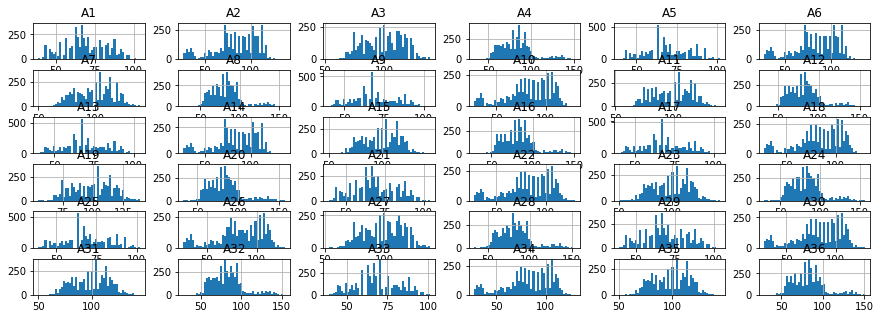

In [33]:
# we will discretise two continuous variables

X_train[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36']].hist(bins=50)
plt.show()

In [34]:
'''
Parameters
----------

cv : int, default=3
    Desired number of cross-validation fold to be used to fit the decision
    tree.

scoring: str, default='neg_mean_squared_error'
    Desired metric to optimise the performance for the tree. Comes from
    sklearn metrics. See DecisionTreeRegressor or DecisionTreeClassifier
    model evaluation documentation for more options:
    https://scikit-learn.org/stable/modules/model_evaluation.html

variables : list
    The list of numerical variables that will be transformed. If None, the
    discretiser will automatically select all numerical type variables.

regression : boolean, default=True
    Indicates whether the discretiser should train a regression or a classification
    decision tree.

param_grid : dictionary, default=None
    The list of parameters over which the decision tree should be optimised
    during the grid search. The param_grid can contain any of the permitted
    parameters for Scikit-learn's DecisionTreeRegressor() or
    DecisionTreeClassifier().

    If None, then param_grid = {'max_depth': [1, 2, 3, 4]}

random_state : int, default=None
    The random_state to initialise the training of the decision tree. It is one
    of the parameters of the Scikit-learn's DecisionTreeRegressor() or
    DecisionTreeClassifier(). For reproducibility it is recommended to set
    the random_state to an integer.
'''
#For DT using regression
#treeDisc = DecisionTreeDiscretiser(cv=3,
 #                                  scoring='neg_mean_squared_error',
 #                                  variables=['recency', 'frequency', 'monetary', 'time'],
 #                                  regression=False,
 #                                  random_state=29)
#regression = True!

# the DecisionTreeDiscretiser needs the target for fitting
#treeDisc.fit(X_train, y_train)


treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36'],
                                   regression=False,
                                   param_grid={'max_depth': [1, 2]},
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2]}, random_state=29,
                        regression=False, scoring='accuracy',
                        variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
                                   'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
                                   'A14', 'A15', 'A16', 'A17', 'A18', 'A19',
                                   'A20', 'A21', 'A22', 'A23', 'A24', 'A25',
                                   'A26', 'A27', 'A28', 'A29', 'A30', ...])

In [35]:
treeDisc.binner_dict_

{'A1': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A2': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A3': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A4': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A5': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A6': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A7': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]},

In [36]:
# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

In [37]:
# here I put side by side the original variable and the transformed variable

tmp = pd.concat([X_train[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'class']],
                 train_t[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'class']]], axis=1)

tmp.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36',  'class', 'A1_binned', 'A2_binned', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36',  'class']

tmp.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
636,87,103,105,83,83,99,101,79,83,95,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.056471,0.044529,0.185002,0.032722,3
420,88,106,111,87,84,102,115,87,84,106,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.000000,0.001580,0.185002,0.032722,3
3605,50,66,86,76,53,66,82,76,60,73,...,0.036819,0.054920,0.043590,0.015717,0.026549,0.056471,0.044529,0.030952,0.032722,1
1857,67,99,113,96,67,91,104,92,59,75,...,0.033581,0.054920,0.001572,0.193795,0.031321,0.056471,0.006356,0.185002,0.032722,1
245,59,56,76,66,59,53,76,70,56,49,...,0.011614,0.054920,0.043590,0.015717,0.018059,0.056471,0.044529,0.024715,0.029933,7


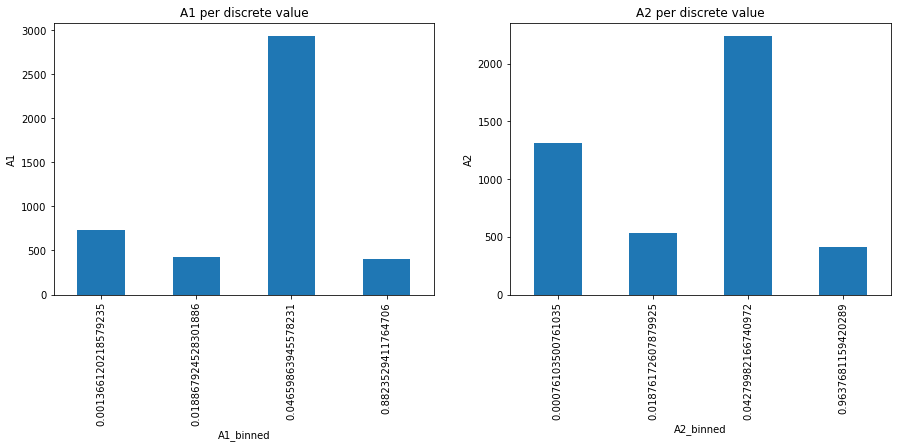

In [38]:
plt.subplot(1,2,1)

plt.subplot(1,2,1)
tmp.groupby('A1_binned')['A1'].count().plot.bar()
plt.ylabel('A1')
plt.title('A1 per discrete value')

plt.subplot(1,2,2)
tmp.groupby('A2_binned')['A2'].count().plot.bar()
plt.ylabel('A2')
plt.title('A2 per discrete value')

plt.show()

In [39]:
tmp2 = train_t
tmp2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
636,0.001366,0.000761,0.123300,0.036511,0.025397,0.021226,0.190582,0.039022,0.019231,0.024345,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.056471,0.044529,0.185002,0.032722,3
420,0.001366,0.000761,0.123300,0.036511,0.025397,0.002326,0.190582,0.039022,0.019231,0.008333,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.000000,0.001580,0.185002,0.032722,3
3605,0.046599,0.042800,0.035587,0.036511,0.042373,0.036662,0.012898,0.039022,0.044430,0.032479,...,0.036819,0.054920,0.043590,0.015717,0.026549,0.056471,0.044529,0.030952,0.032722,1
1857,0.046599,0.018762,0.123300,0.036511,0.042373,0.036662,0.190582,0.039022,0.044430,0.032479,...,0.033581,0.054920,0.001572,0.193795,0.031321,0.056471,0.006356,0.185002,0.032722,1
245,0.046599,0.042800,0.015652,0.014333,0.042373,0.036662,0.012898,0.021930,0.044430,0.032479,...,0.011614,0.054920,0.043590,0.015717,0.018059,0.056471,0.044529,0.024715,0.029933,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.046599,0.042800,0.015652,0.036511,0.042373,0.036662,0.012898,0.010181,0.044430,0.032479,...,0.955335,0.940510,0.975430,0.075601,0.031321,0.056471,0.044529,0.024715,0.029933,5
3264,0.046599,0.018762,0.123300,0.036511,0.042373,0.036662,0.190582,0.039022,0.044430,0.032479,...,0.033581,0.054920,0.010309,0.193795,0.031321,0.056471,0.044529,0.068323,0.032722,1
1653,0.046599,0.042800,0.015652,0.014333,0.042373,0.036662,0.012898,0.010181,0.044430,0.032479,...,0.011614,0.054920,0.043590,0.015717,0.018059,0.056471,0.044529,0.024715,0.029933,7
2607,0.046599,0.000761,0.334471,0.036511,0.042373,0.002326,0.190582,0.039022,0.044430,0.008333,...,0.033581,0.054920,0.001572,0.193795,0.031321,0.056471,0.001580,0.185002,0.032722,1


In [40]:
# Export this dataset after discretization
tmp2.to_csv('satimage_DT_discretized.csv',index=False)